# Problem Statement

#### Needs to be revised

In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

# Introduction to Dataset

In [49]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [50]:
 
loan_df = pandas.read_csv('loan.csv')
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Getting the shape of the dataframe

In [51]:
loan_df.shape


(39717, 111)

As it can be seen that we have 111 columns.We will now remove the unnecessary columns which are not requried.Getting the list of the columns

In [52]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Cleaning the Data

### Columns With all values as Missing or NA

In [53]:
loan_df.isna().sum().sort_values(ascending =False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

We have seen from above that there are columns where all the values are NA.So we will drop those columns from the dataset

In [54]:
loan_df.dropna(how='all',axis=1,inplace=True)

Checking the shape of the dataframe again

In [55]:
loan_df.shape

(39717, 57)

Checking columns which have unique values.If some columns have only 1 unique value then those columns will not play any affect on Loan Charge Off and as well columns that have all values as unique values

In [56]:
columns=loan_df.nunique() 

### Columns with Same Value for All Rows where Unique Values = 1 

In [57]:
# So we are dropping those columns from the dataframe as they won't be having any effect on the outcome of the loan
single_values_columns=columns[columns.values==1]
single_values_columns.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [58]:
loan_df.drop(list(single_values_columns.index),axis=1,inplace=True)

### Columns with Unique Value for All Rows where  Unique Values = Data Set Rows

In [59]:
# So we are dropping those columns from the dataframe as they won't be having any effect on the outcome of the loan
all_unique_values_columns=columns[columns.values==loan_df.shape[0]]
all_unique_values_columns.index

Index(['id', 'member_id', 'url'], dtype='object')

In [60]:
loan_df.drop(list(all_unique_values_columns.index),axis=1,inplace=True)

### Columns with Masked Values

In [61]:
#Looking at the dataset , we can see that there is a column that is masked column that does 
# not add any value to our EDA Process , so its better to remove the column
# zip_code-> The first 3 numbers of the zip code provided by the borrower in the loan application.
columns_to_drop=['zip_code']
loan_df.drop(columns=columns_to_drop,inplace=True)

### Customer Behaviour Variables 

In [62]:
#the customer behavior variables are not available at the time of loan application, and  thus they cannot be used 
# as predictors for credit approval. So we need to ignore these columns while doing our EDA for the goal required
columns_to_drop=['last_credit_pull_d','last_pymnt_d','earliest_cr_line','out_prncp_inv','total_pymnt', 'total_pymnt_inv',
                'total_rec_prncp',  'total_rec_int','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','delinq_2yrs'
                 ,'collection_recovery_fee','next_pymnt_d','total_rec_late_fee','recoveries',
                'inq_last_6mths','revol_bal', 'revol_util', 'total_acc',   'out_prncp'] 
loan_df.drop(columns=columns_to_drop,inplace=True)

### Row Level Filteration

In [63]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [64]:
# Since our objective of doing EDA is to identify whether a loan is charged off or fully paid , Having Records with current 
# status would add noise to the data and will also lead to effect our model. It is therefore recommended to 
# filter out rows that have status as current 
loan_df=loan_df[loan_df['loan_status']!='Current']

Checking the shape of the dataframe

In [65]:
loan_df.shape

(38577, 25)

In [66]:
def get_missing_values_percent(data):
    missing_percentages =  (   data.isna().sum() / len(data.index)) * 100
    missing_percentages =   missing_percentages[missing_percentages > 0].sort_values(ascending=False)
    return missing_percentages.map("{:.2f}%".format)

### Missing Values

In [67]:
# Checking again  the Percentage of the missing values in the columns
get_missing_values_percent(loan_df)

mths_since_last_record    92.90%
mths_since_last_delinq    64.56%
desc                      32.47%
emp_title                  6.19%
emp_length                 2.68%
pub_rec_bankruptcies       1.81%
title                      0.03%
dtype: object

It can be seen from the above derivation that there are still columns where the number of missing values is still very high.We will remove those columns.The columns are
1. next_pymnt_d              
2. mths_since_last_record     
3. mths_since_last_delinq     
4. desc                       

In [68]:
loan_df.drop(columns=['mths_since_last_record','mths_since_last_delinq','desc'],inplace=True)

In [69]:
loan_df.shape

(38577, 22)

Checking the percentage of missing values again

In [70]:
# Checking again  the Percentage of the missing values in the columns
get_missing_values_percent(loan_df)

emp_title               6.19%
emp_length              2.68%
pub_rec_bankruptcies    1.81%
title                   0.03%
dtype: object

### Imputing Missing Values
We will now insert missing values into the other columns which have some missing values.We will be making use of Mode as the element which has to be inserted for NA values.The reason for picking mode is because of biasness which we may get for Numerical Columns.

### emp_title 

In [71]:
loan_df['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [72]:
# Emp Title are titles specified by the borrower while taking loan and there are many unique values , so instead of amputing
# any value , we can safely create a new title as "Not specified" and replace the missing value with the same
loan_df['emp_title'].fillna(value="Not Specified",inplace=True)
loan_df['emp_title'].isna().sum()

0

### emp_length

In [73]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [74]:
# We have replaced the value with mode value , since maximum records were mentioned by the same
mode_value=loan_df['emp_length'].mode()
loan_df['emp_length'].fillna(value=mode_value[0],inplace=True)
loan_df['emp_length'].isna().sum()

0

### pub_rec_bankruptcies

In [75]:
# We will be treating this column as event for the bankruptcy event and for the records not present , the value 
# should be amputed as 0 assuming no such event has happened in the lifetime of the borrower
loan_df['pub_rec_bankruptcies'].value_counts()
loan_df['pub_rec_bankruptcies'].fillna(0,inplace=True)
loan_df['pub_rec_bankruptcies'].isna().sum()

0

### title                   

In [76]:
loan_df['title'].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [77]:
# This Column has around 19k+ different records specified and it will not add value while doing EDA but 
# deleting this column will lead to deletion of information as to how title was specified while inputting it . So instead of
# delete the column , its a better idea to keep it and replace the missing value with our own speicifed values as 
# this is a categorial data and can be interpret in future to view the data in different prespective
loan_df['title'].fillna(value="Not Specified",inplace=True)
loan_df['title'].isna().sum()

0

Checking the datatype of the Columns present in the dataframe

In [78]:
print(loan_df.columns)
print(loan_df.shape)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies'],
      dtype='object')
(38577, 22)


# Standardise the Data

Checking the information present in each column

In [79]:
loan_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Not Specified,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,3,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,3,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Not Specified,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,2,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,10,0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,9,0,0.0


#### Emp Length 
We are replacing less than 1 year as 0 & greater than +10 as 10 and Converting rest of the value into number format

In [80]:
loan_df['emp_length']=loan_df['emp_length'].apply(lambda x: 0 if '<' in str(x) else (10 if '+' in str(x) else str(x).split()[0]))

#### Int_rate
Removing the % Sign and converting string to float

In [81]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:float(str(x)[:-1]))
loan_df['int_rate'].head(5)

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

#### term
Removing the months part and converting the rest of value as float 

In [82]:
loan_df['term']=loan_df['term'].apply(lambda x:float(str(x).replace(" months",'')))
loan_df['term'].head(5)

0    36.0
1    60.0
2    36.0
3    36.0
5    36.0
Name: term, dtype: float64

# Derived Columns

### Issue Month and Issue Year : issue_month , issue_year

In [83]:
loan_df['issue_d']=loan_df.issue_d.apply(lambda d: datetime.strptime(d, '%b-%y'))
loan_df['issue_month']=loan_df['issue_d'].dt.month
loan_df['issue_year']=loan_df['issue_d'].dt.year

### Annual Income Range Bins : annual_inc_rng

In [84]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000]

rng = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000', '180000-200000', '200000-220000',
       '220000-240000']

loan_df['annual_inc_rng'] = pandas.cut(loan_df.annual_inc, bins, labels = rng)

### Interest Range : int_rng

In [85]:
bins = [5, 10, 15, 20, 25]
rng = ['5-10', '10-15', '15-20', '20-25']
loan_df['int_rng'] = pandas.cut(loan_df.int_rate, bins, labels = rng)

### Loan Amount Range  : loan_amnt_rng

In [86]:
loan_df['loan_amnt_rng'] = pandas.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000],
                                      labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

### DTI Range : dti_rng

In [87]:
bins = [0, 5, 10, 15, 20, 25]

rng = ['0-5', '5-10', '10-15', '15-20', '25-30']
loan_df['dti_rng']= pandas.cut(loan_df.dti, bins, labels = rng)

In [88]:
loan_df.shape

(38577, 28)

# Data Analysis 

In [89]:
# Before Moving towards data analysis section , lets look at the data ready for it 
loan_df.shape

(38577, 28)

In [90]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_month,issue_year
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,13.272727,9.275423,0.055422,0.042694,7.114757,2010.309070
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,6.673044,4.401588,0.237804,0.202809,3.408523,0.882658
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,1.000000,2007.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,4.000000e+04,8.130000,6.000000,0.000000,0.000000,4.000000,2010.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,5.886800e+04,13.370000,9.000000,0.000000,0.000000,7.000000,2011.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,8.200000e+04,18.560000,12.000000,0.000000,0.000000,10.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,44.000000,4.000000,2.000000,12.000000,2011.000000


In [91]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'annual_inc_rng', 'int_rng', 'loan_amnt_rng', 'dti_rng'],
      dtype='object')

# Common Functions 

In [92]:
def find_outliers_IQR(data):
    # Calculate quartiles and interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Define the outlier step
    outlier_step = 1.5 * IQR 
    
    # Identify outliers
    outliers = (data < Q1 - outlier_step) | (data > Q3 + outlier_step)
      

    return outliers , outliers.sum() , int(outliers.sum() * 100 / len(data))

# Univariate Analysis

## loan_amnt

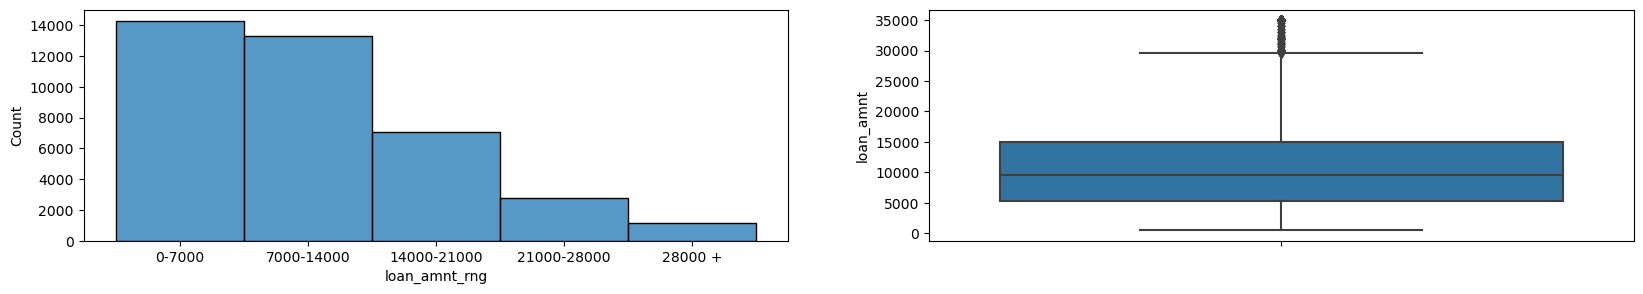

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3))
# plot data on first subplot
sns.histplot(data=loan_df,x='loan_amnt_rng',bins = 10,ax=ax1)
# plot data on second subplot
sns.boxplot(y=loan_df['loan_amnt'])
# display the plot
plt.show() 

In [94]:
outliers , count_of_outliers, percentage_of_outliers = find_outliers_IQR(loan_df['loan_amnt'])
print("Records identified as outliers are : {} ({}%)".format(count_of_outliers,percentage_of_outliers)) 
## Although the number of records with outlier values is small, it is not recommended to replace their 
## values with mean or median as doing so can significantly affect the distribution of other columns. 
## Therefore, it may be better to remove these records from the dataset
loan_df.drop(loan_df[outliers].index,inplace=True)
loan_df.shape

Records identified as outliers are : 1088 (2%)


(37489, 28)

In [197]:
loan_df['loan_amnt_rng'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%")

0-7000         39%
7000-14000     36%
14000-21000    18%
21000-28000     7%
28000 +         0%
Name: loan_amnt_rng, dtype: object

#### 75% of the Loans are given in smaller amount ranging below $14k  

## annual_inc

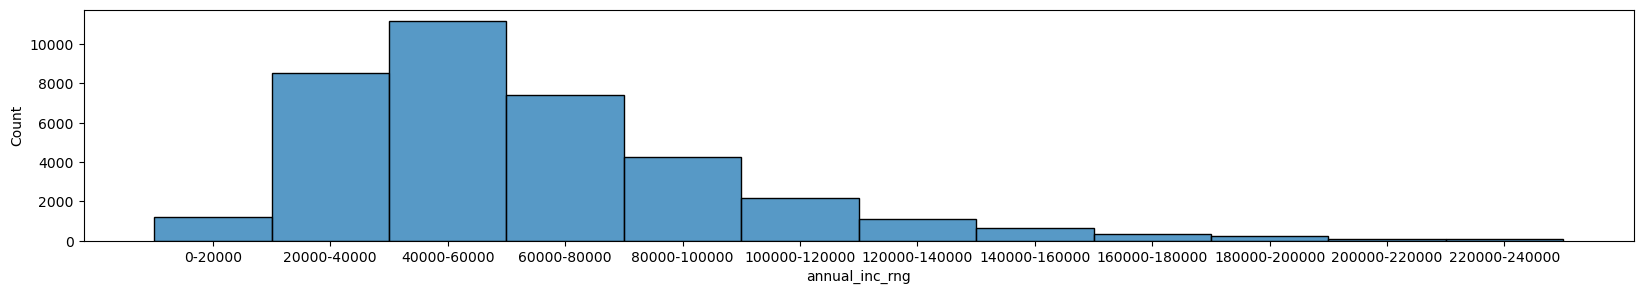

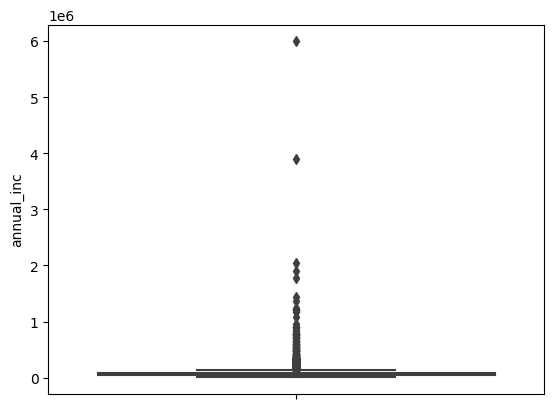

In [95]:
plt.subplots( figsize=(20, 3))
# plot data on first subplot
sns.histplot(data=loan_df,x='annual_inc_rng',bins = 20)
plt.show() 
# plot data on second subplot
sns.boxplot(y=loan_df['annual_inc'])
# display the plot
plt.show() 

In [96]:
outliers , count_of_outliers, percentage_of_outliers = find_outliers_IQR(loan_df['annual_inc'])
#print("Threshold value for the Column {}: {}".format("loan_amnt", threshhold_value))
print("Records identified as outliers are : {} ({}%)".format(count_of_outliers,percentage_of_outliers)) 

## Although the number of records with outlier values is small, it is not recommended to replace their 
## values with mean or median as doing so can significantly affect the distribution of other columns. 
## Therefore, it may be better to remove these records from the dataset
loan_df.drop(loan_df[outliers].index,inplace=True)
loan_df.shape

Records identified as outliers are : 1661 (4%)


(35828, 28)

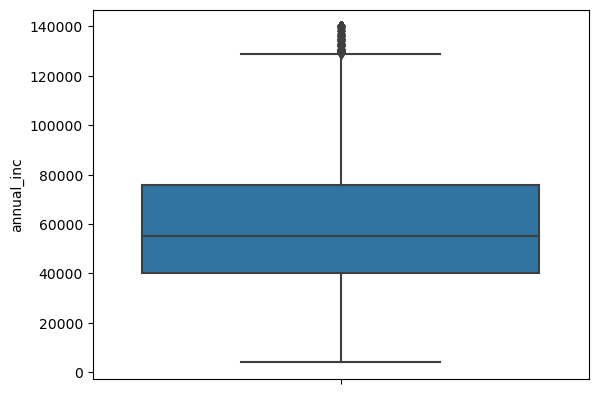

In [159]:
# plot data to show changes after removing outliers
#sns.boxplot(y=loan_df['annual_inc'])
sns.boxplot(y=loan_df['annual_inc'])
# display the plot
plt.show()

#### Most of the loans are given to mid range income group. The highest income range taking maximum loan belongs to 40K-60K $ 

## int_rate

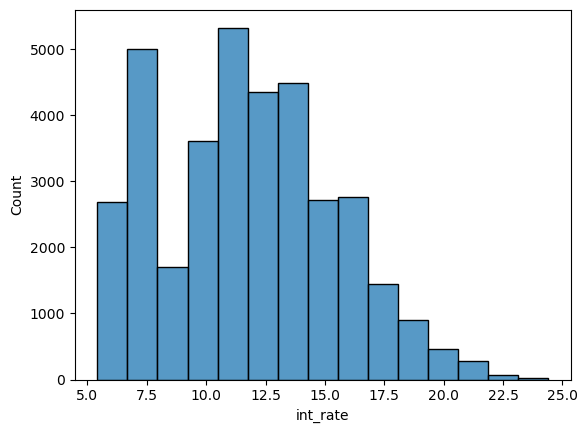

count    35828.000000
mean        11.799003
std          3.611156
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         24.400000
Name: int_rate, dtype: float64

In [98]:
sns.histplot(data=loan_df,x='int_rate',bins=15)
plt.show()

loan_df['int_rate'].describe()

**Interest Rates between 10.5 and 12 are the highest**

### Checking Similarity between 3 columns (loan_amnt,funded_amnt,funded_amt_inv)

Text(0.5, 1.0, 'Investor Funded Amount')

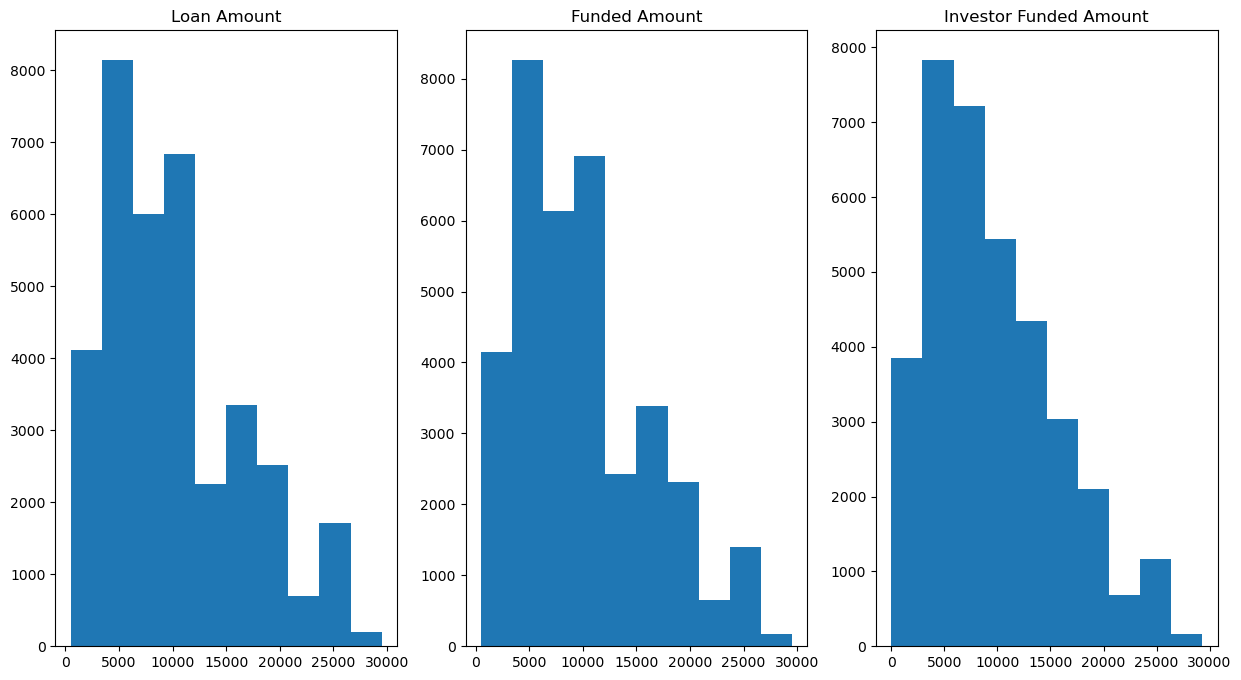

In [99]:
plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
ax=plt.hist(data=loan_df,x='loan_amnt',bins=10)
plt.title("Loan Amount")
plt.subplot(1, 3, 2)
plt.hist(data=loan_df,x='funded_amnt',bins=10)
plt.title("Funded Amount")
plt.subplot(1, 3, 3)
plt.hist(data=loan_df,x='funded_amnt_inv',bins=10)
plt.title("Investor Funded Amount")

In [100]:
## We can see that there is not a lot of difference in these Loan values

## addr_state

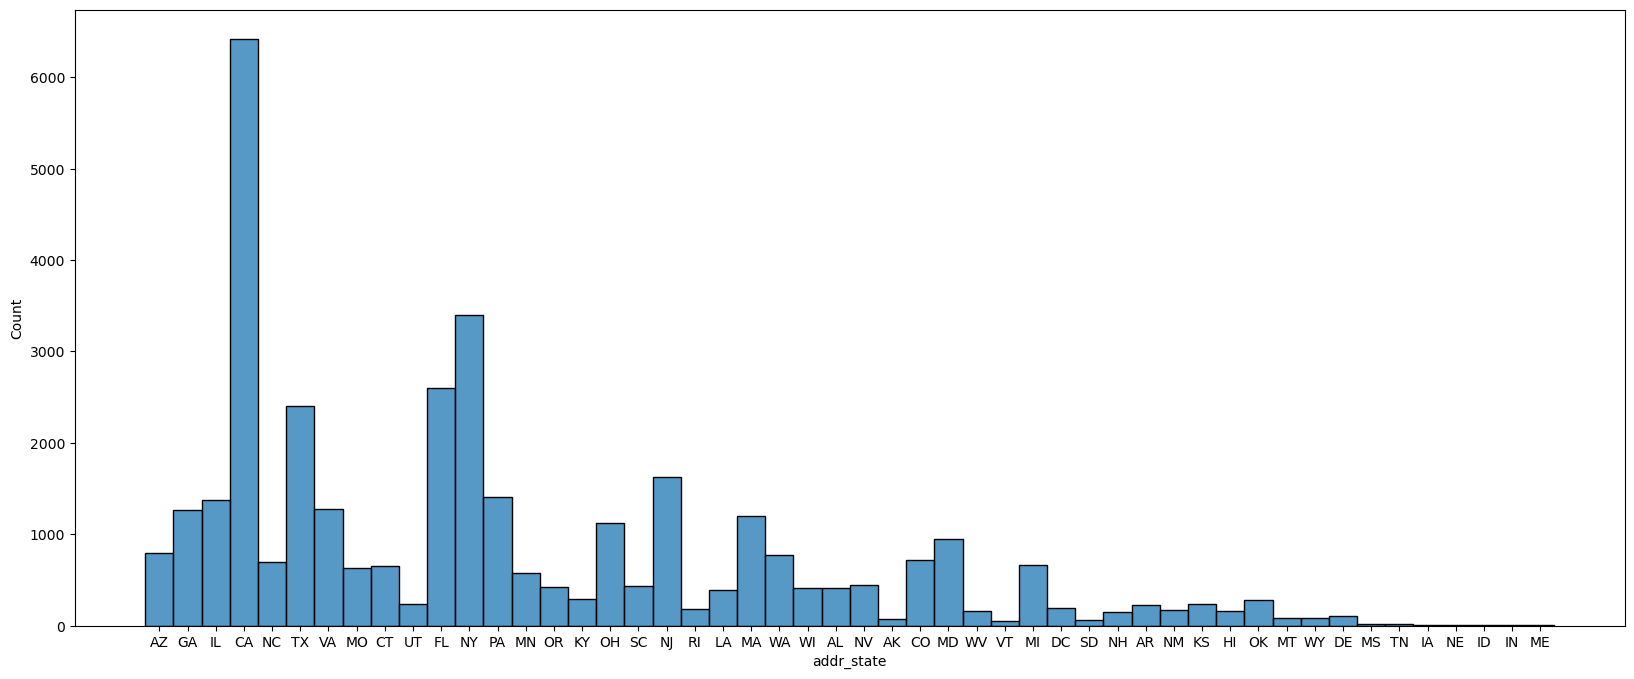

In [101]:
plt.figure(figsize=(20,8))
sns.histplot(data=loan_df,x='addr_state',bins=15)
plt.show()

In [195]:
loan_df['addr_state'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%")

CA    18%
NY     9%
FL     7%
TX     7%
NJ     5%
PA     4%
IL     4%
VA     4%
GA     4%
MA     3%
OH     3%
MD     3%
AZ     2%
WA     2%
CO     2%
NC     2%
MI     2%
CT     2%
MO     2%
MN     2%
NV     1%
SC     1%
OR     1%
WI     1%
AL     1%
LA     1%
KY     1%
OK     1%
KS     1%
UT     1%
AR     1%
DC     1%
RI     1%
NM     0%
WV     0%
HI     0%
NH     0%
DE     0%
MT     0%
WY     0%
AK     0%
SD     0%
VT     0%
MS     0%
TN     0%
IN     0%
IA     0%
NE     0%
ID     0%
ME     0%
Name: addr_state, dtype: object

**18% of the loan disbursements are from California**

## emp_length

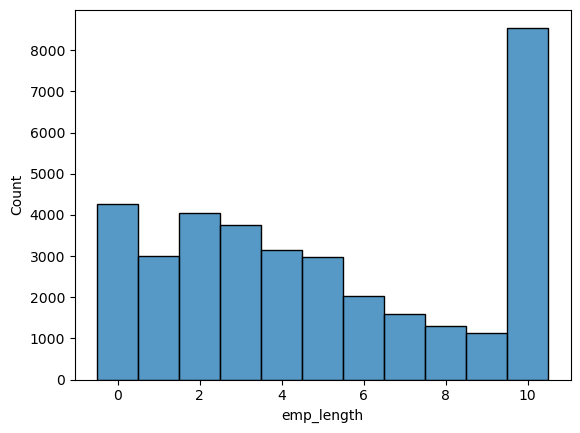

In [102]:
sns.histplot(data=loan_df,x='emp_length',bins=11)
plt.show()

In [194]:
loan_df['emp_length'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%") 

10    24%
0     12%
2     11%
3     11%
4      9%
1      8%
5      8%
6      6%
7      4%
8      4%
9      3%
Name: emp_length, dtype: object

***24% of the Loans are given to people with 10 or more years of experience***

## home_ownership

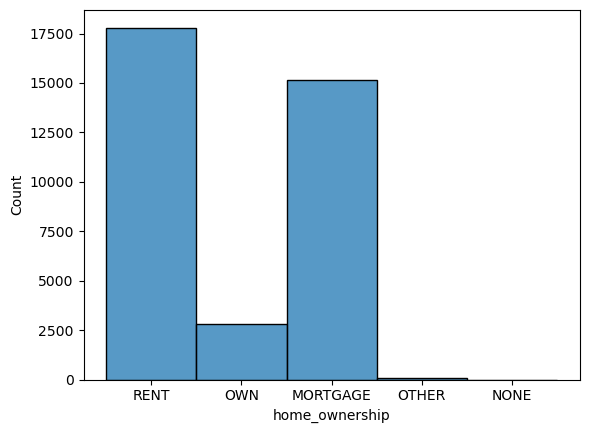

In [103]:
sns.histplot(data=loan_df,x='home_ownership',bins=4)
plt.show()

In [193]:
loan_df['home_ownership'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%") 

RENT        50%
MORTGAGE    42%
OWN          8%
OTHER        0%
NONE         0%
Name: home_ownership, dtype: object

**50% of the loan are given to applicants who are living on the rent**

## installment

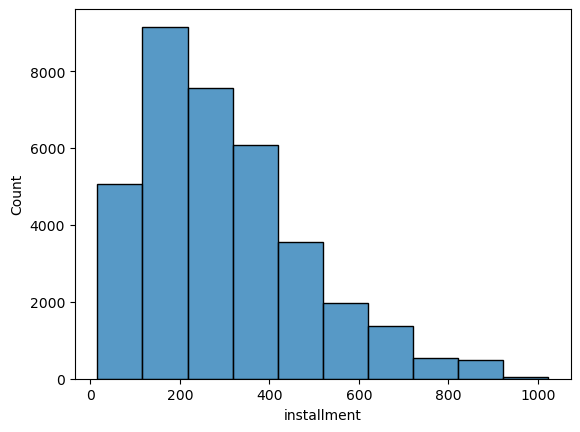

In [104]:
sns.histplot(data=loan_df,x='installment',bins=10)
plt.show()

In [176]:
loan_df['installment'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%").sort_values(ascending=False)

311.11    0%
539.61    0%
212.19    0%
225.83    0%
191.75    0%
          ..
38.87     0%
66.33     0%
72.61     0%
240.68    0%
255.43    0%
Name: installment, Length: 14170, dtype: object

***Most of the installments are between 150-300***

## term (Loan Tenure)

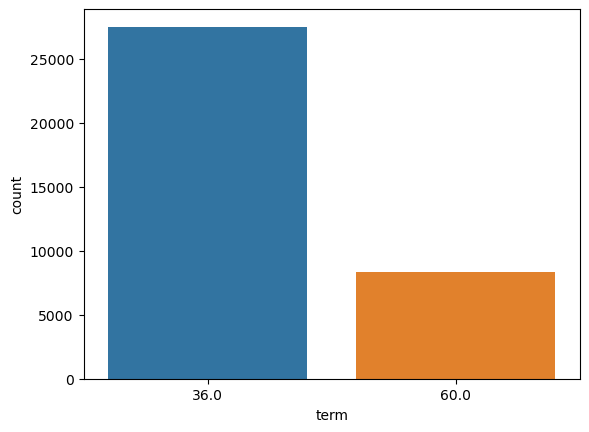

In [105]:
##Let us see the term distribution  for loans
sns.countplot(data=loan_df,x='term')
plt.show()

In [177]:
loan_df['term'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%") 

36.0    77%
60.0    23%
Name: term, dtype: object

***77% of the loans have term of 36 months***

## verification_status

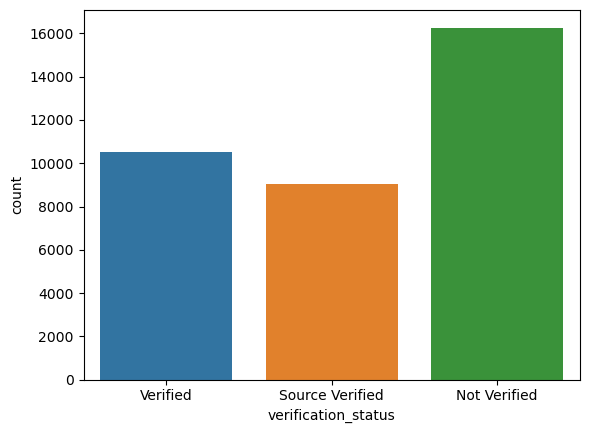

In [106]:
sns.countplot(data=loan_df,x='verification_status')
plt.show()

In [178]:
loan_df['verification_status'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%").sort_values(ascending=False)

Not Verified       45%
Verified           29%
Source Verified    25%
Name: verification_status, dtype: object

**45% of the Loans are not verified**

## grade

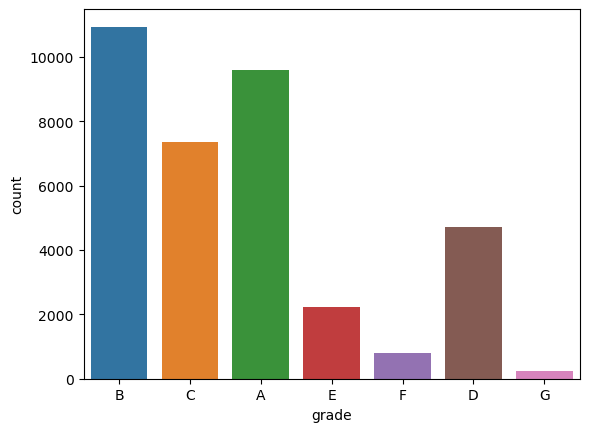

In [107]:
sns.countplot(data=loan_df,x='grade')
plt.show()

In [191]:
loan_df['grade'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%")

B    31%
A    27%
C    20%
D    13%
E     6%
F     2%
G     1%
Name: grade, dtype: object

**58% of the loan count disbursed fall in the category of Grade B and Grade A**

## purpose

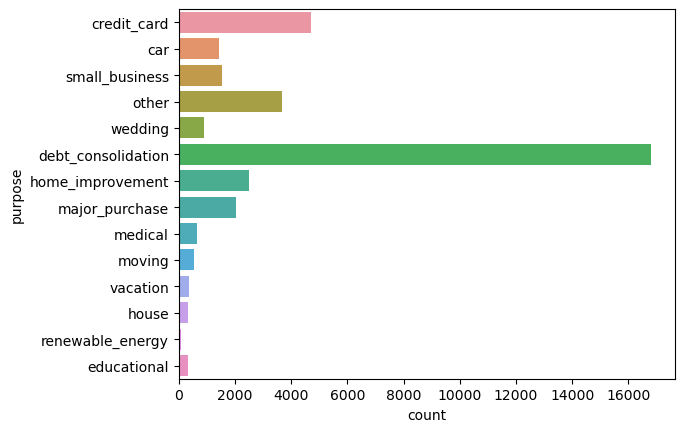

In [108]:
sns.countplot(data=loan_df,y='purpose')
plt.show()

In [171]:
loan_df['purpose'].value_counts(normalize=True).map(lambda x: f"{round(x*100)}%")

debt_consolidation    47%
credit_card           13%
other                 10%
home_improvement       7%
major_purchase         6%
small_business         4%
car                    4%
wedding                2%
medical                2%
moving                 2%
vacation               1%
house                  1%
educational            1%
renewable_energy       0%
Name: purpose, dtype: object

**47% of loan have purpose for loan as Debt Consolidation**

## dti

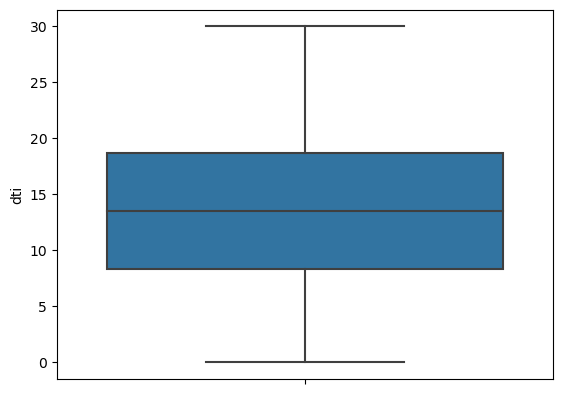

In [109]:
sns.boxplot(y=loan_df['dti'])
plt.show()

In [110]:
loan_df['dti'].describe()

count    35828.000000
mean        13.423416
std          6.662476
min          0.000000
25%          8.320000
50%         13.540000
75%         18.692500
max         29.990000
Name: dti, dtype: float64

    #### Most of values for the DT col falls below 18%

# Bivariate Analysis

### Common Function 

In [111]:
def create_pivot_table(col):
    table=loan_df.pivot_table(values = 'funded_amnt',
                      index = col,
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0
                      )
    table['Total']=table['Charged Off']+table['Fully Paid']
    table['Charged Off Rate']=100*(round((table['Charged Off']/table['Total']), 6))
    # Sort the pivot table by the "Charged Off Rate" column in descending order
    sorted_table = table.sort_values(by="Charged Off Rate", ascending=False)

    return sorted_table

def create_bivariate_barplot_graph(x_axis,y_axis,type):
       if type=='barplot':
            sns.barplot(x=x_axis,y=y_axis) 
            plt.show()
            return


###  Home OwnerShip and Charge off 

In [112]:
chargeoff_rate_homeownership=create_pivot_table('home_ownership')
chargeoff_rate_homeownership

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
home_ownership,,,,
OTHER,17,75,92,18.4783
RENT,2707,15094,17801,15.2070
OWN,419,2385,2804,14.9429
MORTGAGE,2059,13069,15128,13.6105
NONE,0,3,3,0.0000


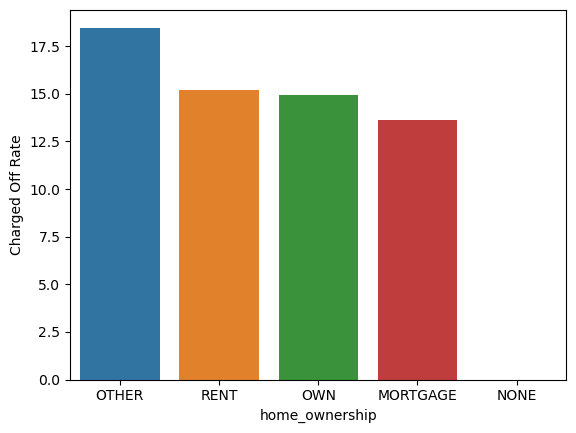

In [113]:
create_bivariate_barplot_graph(chargeoff_rate_homeownership[0:].index,
                               chargeoff_rate_homeownership[0:]['Charged Off Rate'],'barplot')

#### Loan Defaulted for Other category is high but we cant find what does other denote , by business understanding "other" category belongs to either co owner property or named property keeping in consideration the rest of categories listed. No concrete conclusion can be made here as to which type of home ownership has higher propotion of defaulters

### addr_state and Charge off

In [114]:
chargeoff_rate_state=create_pivot_table('addr_state')
chargeoff_rate_state.describe()
## it is observed that there is a lot of variation between how the loan applications are spread over different 
## states , since min for the total column is 3 and max is 6419 with a standard deviation of 1090

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
count,50.000000,50.000000,50.000000,50.000000
mean,104.040000,612.520000,716.560000,14.098144
std,169.484327,923.411692,1090.891326,8.064882
min,0.000000,2.000000,3.000000,0.000000
25%,12.250000,104.000000,118.750000,11.743100
50%,48.500000,345.500000,400.500000,13.550350
75%,120.250000,671.000000,787.750000,15.821250
max,1035.000000,5384.000000,6419.000000,60.000000


In [115]:
chargeoff_rate_state
## Lets see state wise how the data is spread, looking at NE which show the max charge off rate % but the total cases 
## are just 3 where as the state with max total cases like CA has around 16% charged off 

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
addr_state,,,,
NE,3,2,5,60.0000
NV,98,348,446,21.9731
ID,1,4,5,20.0000
SD,12,49,61,19.6721
AK,13,55,68,19.1176
FL,468,2134,2602,17.9862
HI,28,129,157,17.8344
MO,109,524,633,17.2196
NM,29,143,172,16.8605


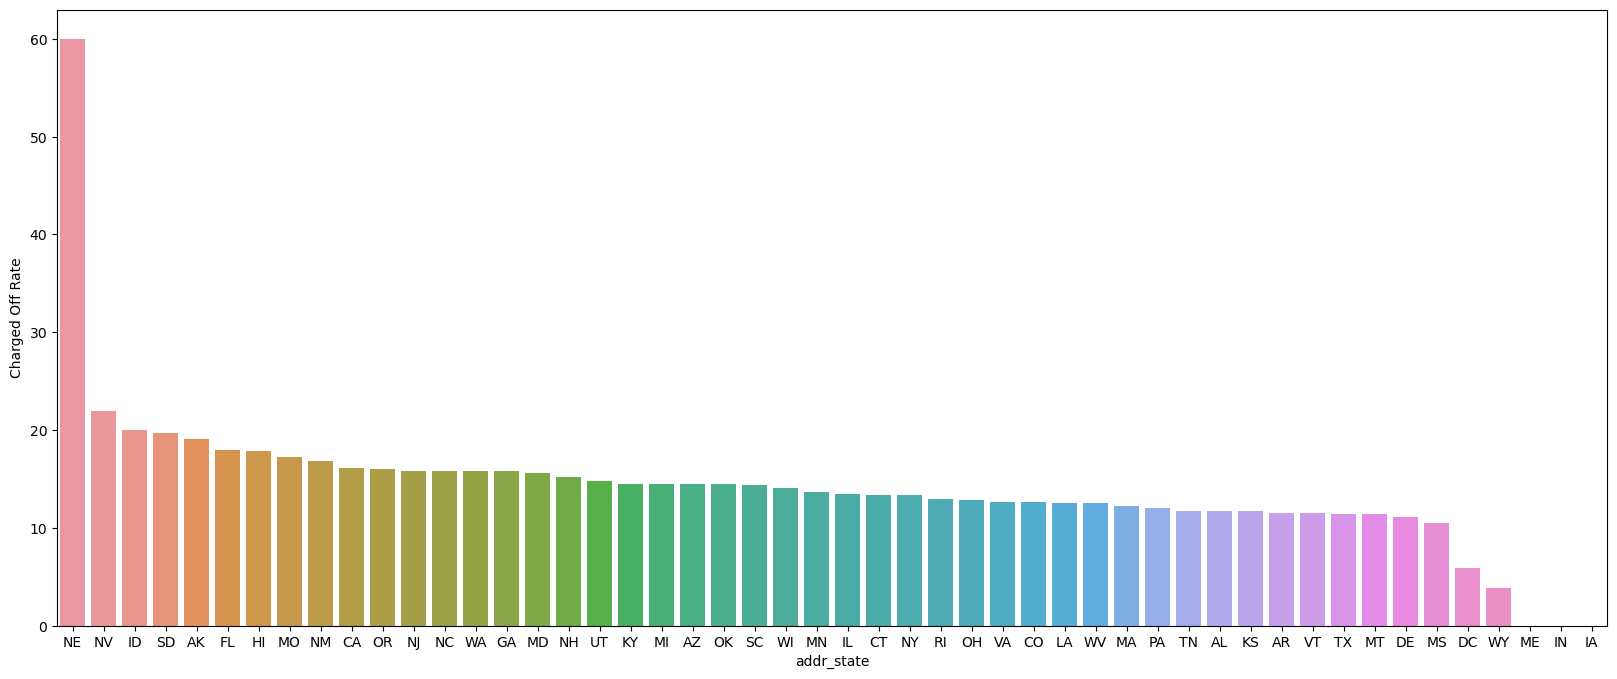

In [116]:
plt.figure(figsize=(20,8))
create_bivariate_barplot_graph(chargeoff_rate_state[0:].index,chargeoff_rate_state[0:]['Charged Off Rate'],'barplot')

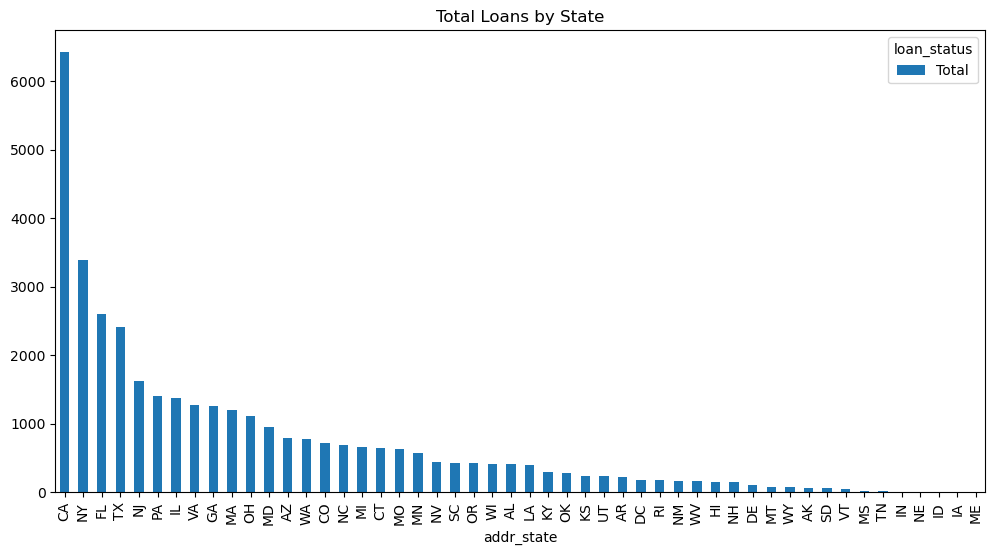

In [117]:
# Create a variable to hold the pivot table with the 'Total' column only
total_loans = chargeoff_rate_state[['Total']]

# Sort the pivot table by the 'Total' column in descending order
sorted_table = total_loans.sort_values(by='Total', ascending=False)

# Create a bar chart showing the distribution of total loans state-wise
sorted_table.plot(kind='bar', figsize=(12,6), title='Total Loans by State')
plt.show()

#### Loan Defaulted Percent is higher for State NE , but it also needs to be mentioned here that no. of loan application processed for this state are too low , the state that has higher number  of loans processed is CA which has default ratio of 16.12 % and DC stands with just 5% default rate with total cases processed as 187

### purpose and Charge off

In [118]:
chargeoff_rate_purpose=create_pivot_table('purpose')
chargeoff_rate_purpose

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
purpose,,,,
small_business,416,1127,1543,26.9605
renewable_energy,18,76,94,19.1489
educational,54,258,312,17.3077
moving,90,459,549,16.3934
other,595,3062,3657,16.2702
medical,102,535,637,16.0126
house,52,275,327,15.9021
debt_consolidation,2544,14263,16807,15.1366
vacation,52,312,364,14.2857


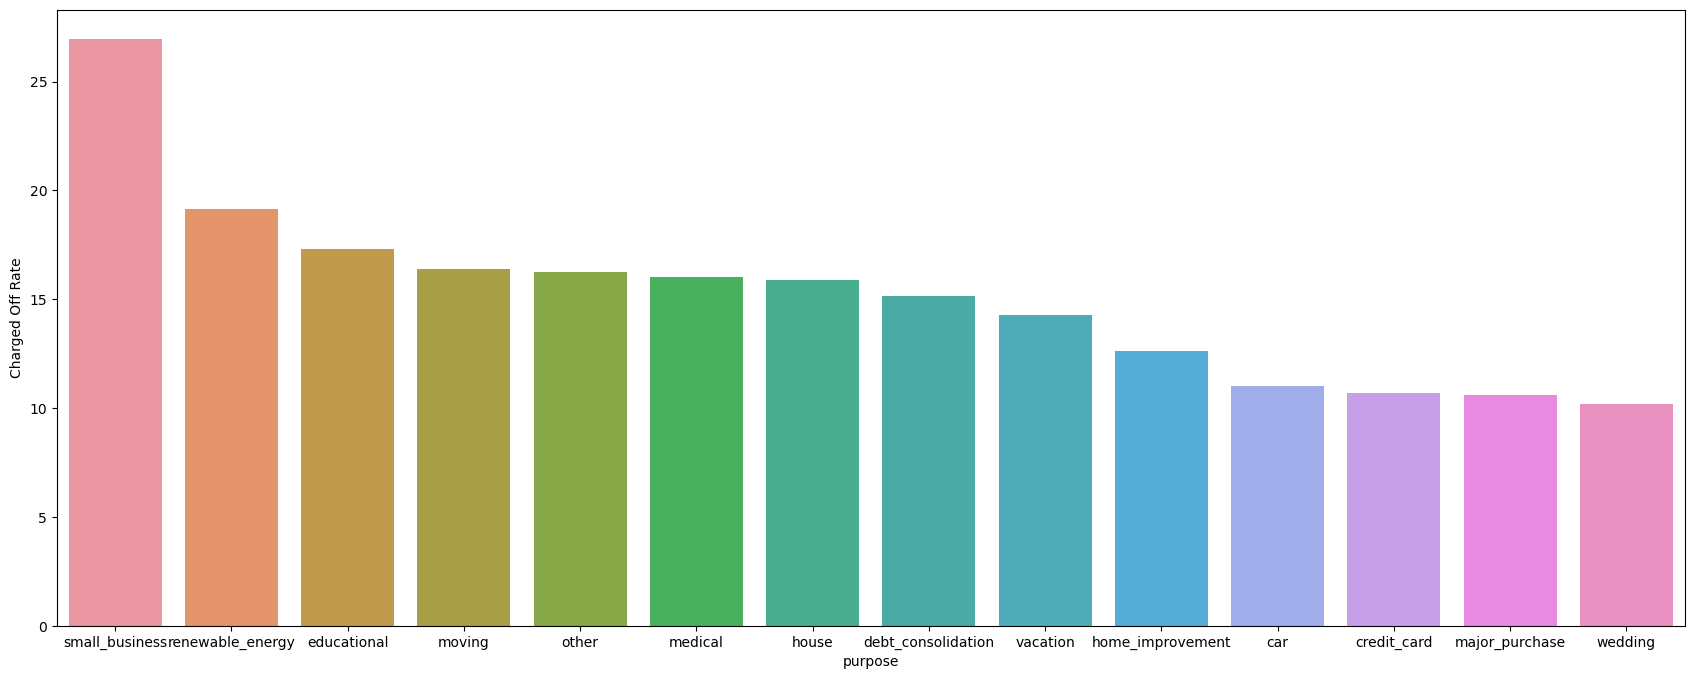

In [119]:
plt.figure(figsize=(21,8))
create_bivariate_barplot_graph(chargeoff_rate_purpose[0:].index,chargeoff_rate_purpose[0:]['Charged Off Rate'],'barplot')

In [226]:
charged_off_loans = loan_df[loan_df["loan_status"] == "Charged Off"]
charged_off_by_purpose = charged_off_loans.groupby("purpose")["loan_status"].size()
total_loans_by_purpose = loan_df.groupby("purpose")["loan_status"].size()
proportion_charged_off_by_purpose =   charged_off_by_purpose / total_loans_by_purpose * 100
proportion_charged_off_by_purpose.astype(int).sort_values(ascending=False).apply( lambda x: f"{int(x)}%")

purpose
small_business        26%
renewable_energy      19%
educational           17%
medical               16%
moving                16%
other                 16%
debt_consolidation    15%
house                 15%
vacation              14%
home_improvement      12%
car                   10%
credit_card           10%
major_purchase        10%
wedding               10%
Name: loan_status, dtype: object

#### 26% of the Charged off Cases have purpose as "small business" making this as the highest risk candidate

### Term and Charge Off

In [120]:
chargeoff_rate_term=create_pivot_table('term')
chargeoff_rate_term


loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
term,,,,
60.0,2111,6199,8310,25.4031
36.0,3091,24427,27518,11.2326


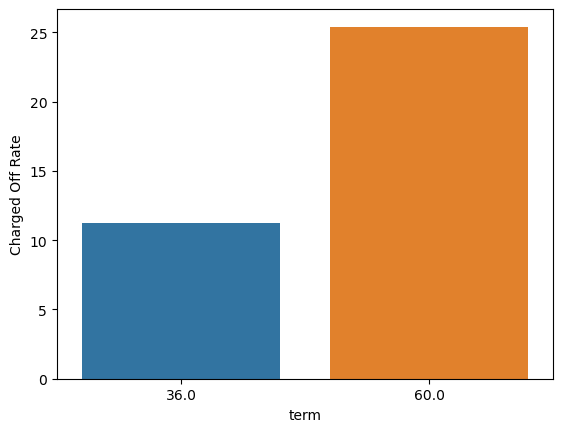

In [121]:
create_bivariate_barplot_graph(chargeoff_rate_term.index,chargeoff_rate_term['Charged Off Rate'],'barplot')

#### Loans Application with higher term have higher chances of getting defaulted. It could be because a longer period of time does have higher chances of loan repayment capability as compare to shorter periods

### grade and Charge Off

In [122]:
chargeoff_rate_grade=create_pivot_table('grade')
chargeoff_rate_grade

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
grade,,,,
G,82,145,227,36.1233
F,252,541,793,31.7781
E,598,1631,2229,26.8282
D,1042,3669,4711,22.1184
C,1290,6053,7343,17.5678
B,1347,9588,10935,12.3182
A,591,8999,9590,6.1627


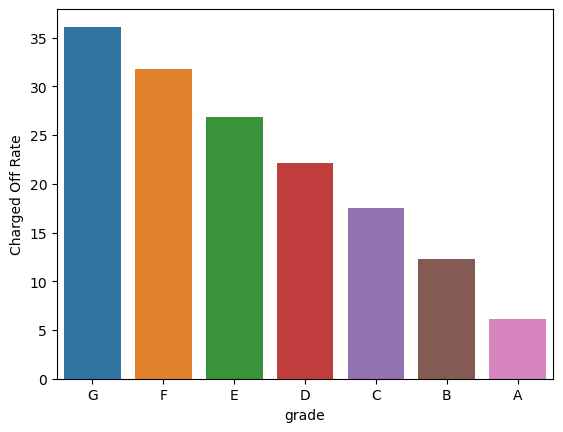

In [123]:
create_bivariate_barplot_graph(chargeoff_rate_grade[0:].index,chargeoff_rate_grade[0:]['Charged Off Rate'],'barplot')

####  It is visually visible that as the grade increases , the risk of getting default also increases. Loans that are marked as Grade A has the lowest risk of getting defaulted. Grade G are the riskiest loan

### emp_length and Charge off

In [124]:
chargeoff_rate_employment_length=create_pivot_table('emp_length')
chargeoff_rate_employment_length

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
emp_length,,,,
10,1402,7150,8552,16.3938
7,240,1364,1604,14.9626
1,441,2565,3006,14.6707
8,186,1118,1304,14.2638
5,424,2554,2978,14.2377
0,601,3667,4268,14.0815
6,284,1744,2028,14.0039
3,514,3252,3766,13.6484
4,428,2711,3139,13.6349


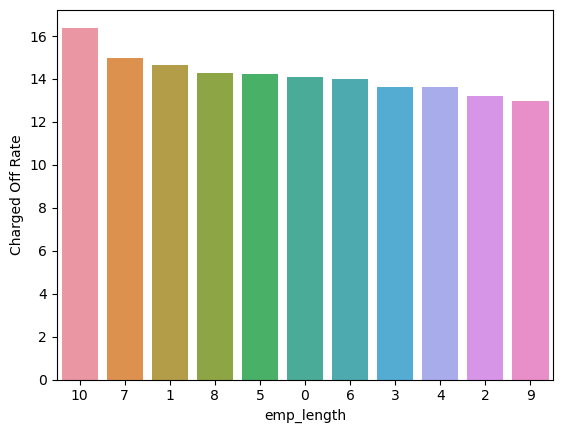

In [125]:
create_bivariate_barplot_graph(chargeoff_rate_employment_length[0:].index
                               ,chargeoff_rate_employment_length[0:]['Charged Off Rate'],'barplot')

#### Charged off rate increase as the employee term of service increases

### annual_inc_rng and charge Off

In [126]:
chargeoff_rate_annual_income=create_pivot_table('annual_inc_rng')
chargeoff_rate_annual_income

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
annual_inc_rng,,,,
0-20000,237,943,1180,20.0847
20000-40000,1514,7004,8518,17.7741
40000-60000,1705,9496,11201,15.2219
60000-80000,958,6436,7394,12.9565
80000-100000,468,3799,4267,10.9679
120000-140000,117,980,1097,10.6655
100000-120000,203,1968,2171,9.3505


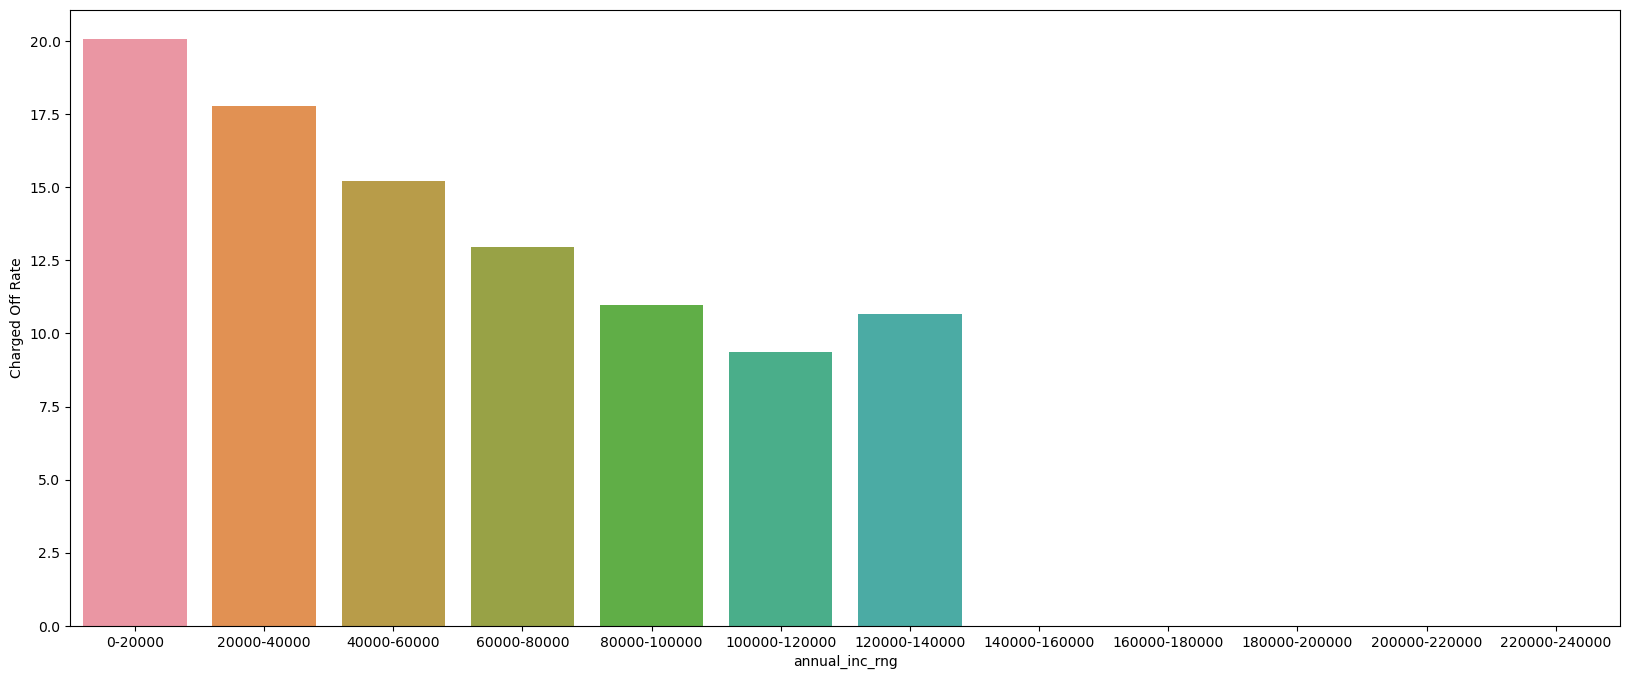

In [127]:
plt.figure(figsize=(20,8))

create_bivariate_barplot_graph(chargeoff_rate_annual_income[0:].index,
                               chargeoff_rate_annual_income[0:]['Charged Off Rate'],'barplot')

#### `Higher the income range , less the chances of getting charged off`

### verification_status and charge Off

In [128]:
chargeoff_verify_status=create_pivot_table('verification_status')
chargeoff_verify_status

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
verification_status,,,,
Verified,1762,8747,10509,16.7666
Source Verified,1346,7703,9049,14.8746
Not Verified,2094,14176,16270,12.8703


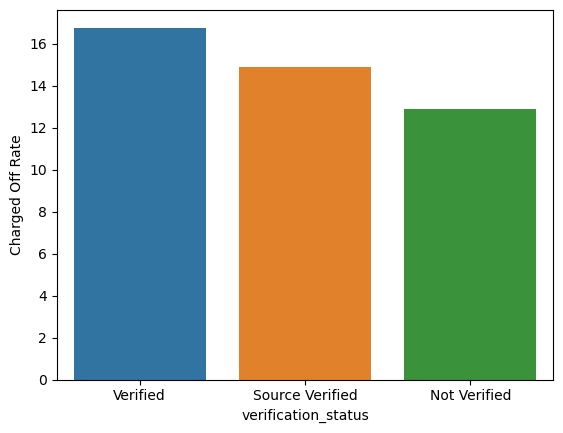

In [129]:
create_bivariate_barplot_graph(chargeoff_verify_status[0:].index,
                               chargeoff_verify_status[0:]['Charged Off Rate'],'barplot')

#### This was an unxpected conclusion came out which shows that verified borrowers got higher charged off but ideally it should not be the case  since a verification process ensures that borrowers repayment capability is fine. The data suggest to check the verification process Standard Operating Procedures ( SOP ) and make necessary changes required to ensure that a verfiied status ensures low risk of getting charged off 

### int_rng  and Charge off

In [130]:
chargeoff_verify_int=create_pivot_table('int_rng')
chargeoff_verify_int

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
int_rng,,,,
20-25,219,333,552,39.6739
15-20,1601,4819,6420,24.9377
10-15,2573,14532,17105,15.0424
5-10,809,10942,11751,6.8845


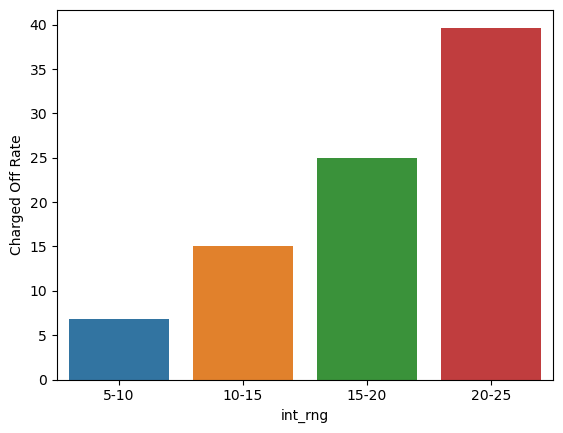

In [131]:
create_bivariate_barplot_graph(chargeoff_verify_int[0:].index
                               ,chargeoff_verify_int[0:]['Charged Off Rate'],'barplot')

#### As the interest rate increases , the chances of getting charged off also increase.

### loan_amnt_rng and Charge Off

In [132]:
chargeoff_verify_loan_amnt=create_pivot_table('loan_amnt_rng')
chargeoff_verify_loan_amnt

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
loan_amnt_rng,,,,
21000-28000,480,1888,2368,20.2703
14000-21000,1109,5449,6558,16.9106
28000 +,7,36,43,16.2791
7000-14000,1742,11068,12810,13.5988
0-7000,1864,12185,14049,13.2678


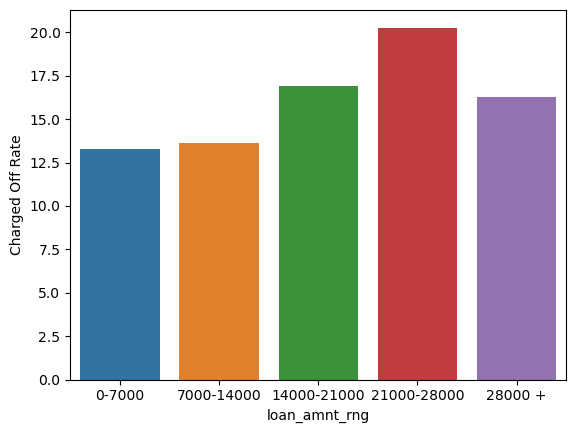

In [133]:
create_bivariate_barplot_graph(chargeoff_verify_loan_amnt[0:].index,
                               chargeoff_verify_loan_amnt[0:]['Charged Off Rate'],'barplot')

####  Higher the loan amount , more the chances of getting charged off but this is applicable only up to a certain loan range. As the loan amount reaches the upper max level, it is evident that chances of getting charged off also reduces.

### issue_year and  charge off

In [134]:
chargeoff_verify_year_wise=create_pivot_table('issue_year')
chargeoff_verify_year_wise

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
issue_year,,,,
2007,41,189,230,17.8261
2008,237,1252,1489,15.9167
2011,2928,15699,18627,15.7191
2010,1429,9578,11007,12.9826
2009,567,3908,4475,12.6704


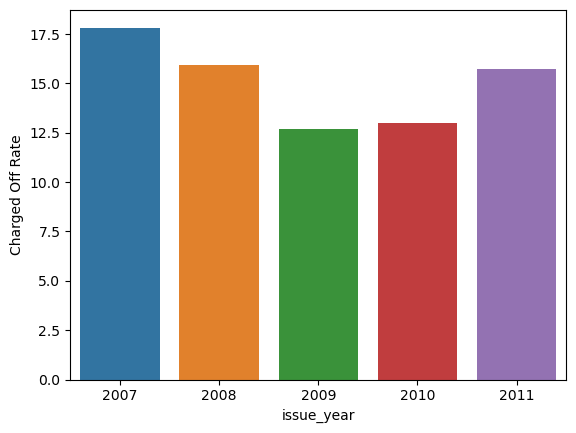

In [135]:
create_bivariate_barplot_graph(chargeoff_verify_year_wise[0:].index,
                               chargeoff_verify_year_wise[0:]['Charged Off Rate'],'barplot')

#### Loans issued in 2007 got the most charged off which got improved in the next 3 years gradually but a rise was again visible in 2011 , if we look  into the economical situation of the country , we will find that The performance of the US economy from 2007 to 2011 was characterized by a severe recession that began in late 2007 and lasted until mid-2009. So somehow , the country economy plays  a role in the charged off status. When the economy is not performing well , the chances of charged off increases.

### dti_rng and charge Off

In [136]:
chargeoff_verify_dti=create_pivot_table('dti_rng')
chargeoff_verify_dti

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
dti_rng,,,,
25-30,1063,5238,6301,16.8703
15-20,1281,7026,8307,15.4207
10-15,1296,7664,8960,14.4643
5-10,909,6219,7128,12.7525
0-5,547,3827,4374,12.5057


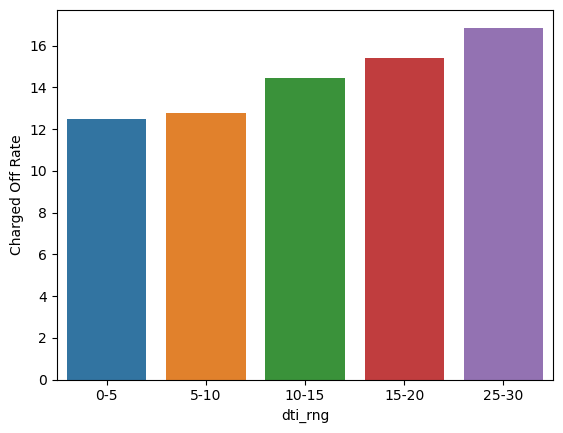

In [137]:
create_bivariate_barplot_graph(chargeoff_verify_dti[0:].index,
                               chargeoff_verify_dti[0:]['Charged Off Rate'],'barplot')

#### DTI is the ratio to calculate debt vs monthly income of the borrower and it is clearly visible that as this ration increases ,  the risk of getting charged off also increases.

# Bivariate Analysis Part 2

In this section we will observe relation between different columns present in dataset.We will do below checks: 

*   Loan Amount vs Loan Purpose
*   Loan Amount vs Grade
*   Grade vs Intrest Rate
*   Loan Amount vs State
*   Intrest Rate vs State
*   Annual Income vs State
*   Term Vs Intrest Rate
*   DTI vs Grade 
*   Loan Amount vs Annual Income


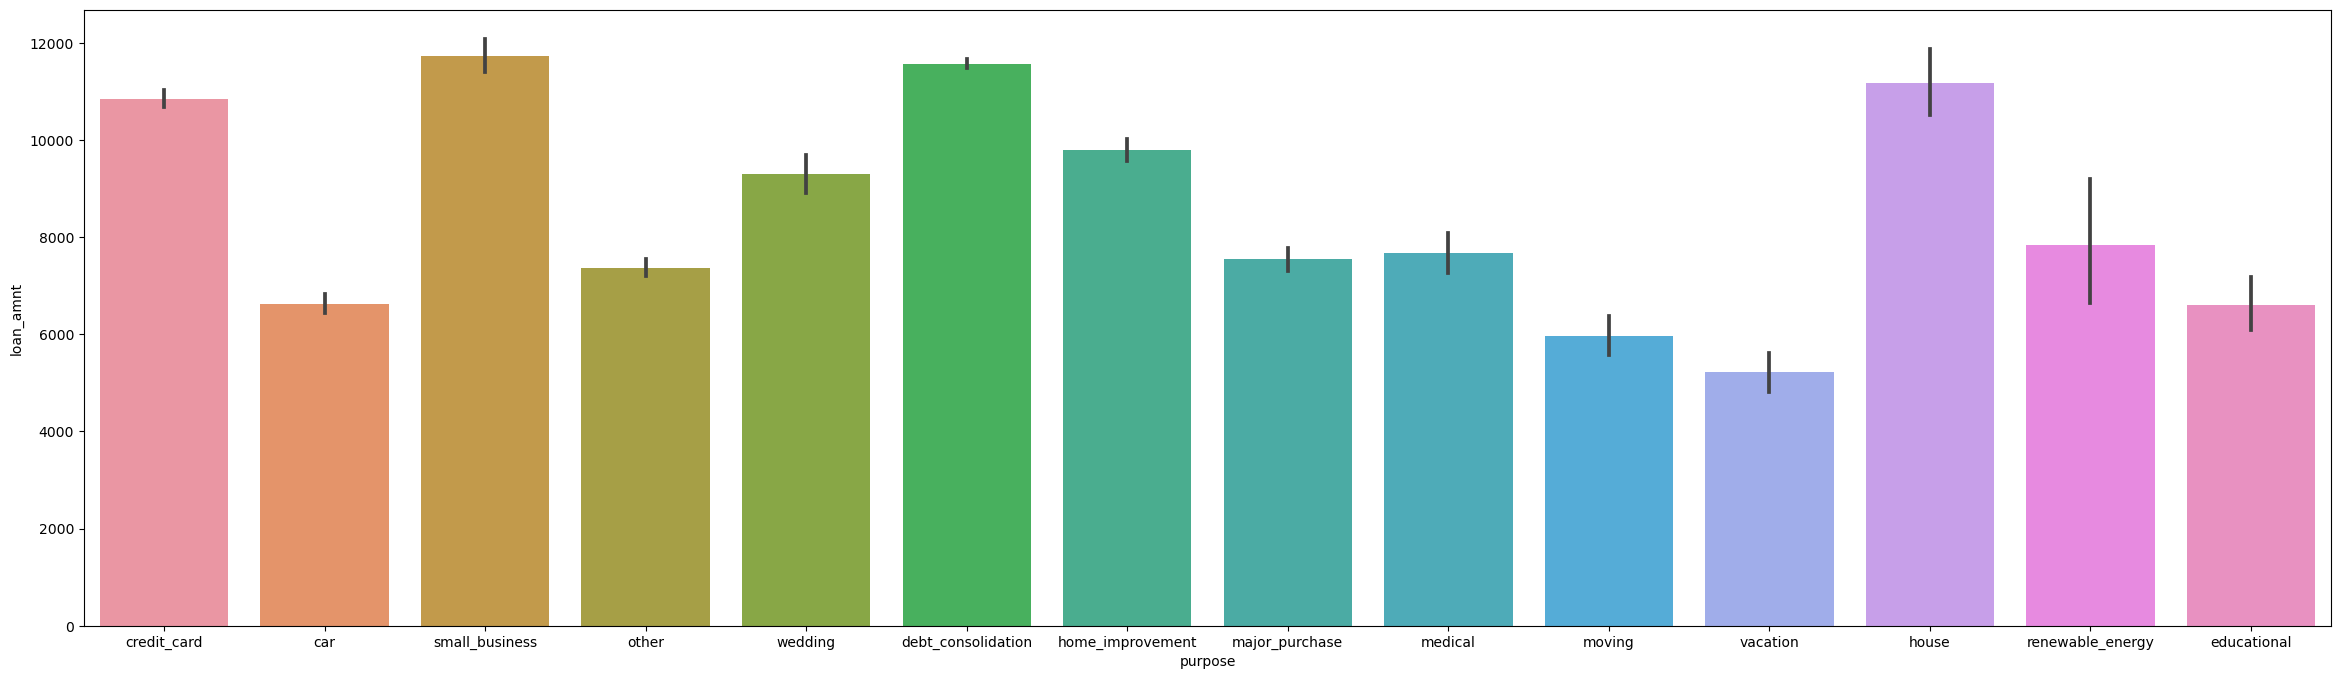

In [138]:
plt.figure(figsize=(29,8))
#sns.barplot(data=loan_df,y='loan_amnt',x='purpose')
sns.barplot(data=loan_df, y='loan_amnt', x='purpose')
plt.show()

In [240]:
### Lets look at the % of loan count sanctioned for each purpose
loan_amnt_by_purpose = loan_df.groupby("purpose")["loan_amnt"].count()
loan_amnt_pct_by_purpose = loan_amnt_by_purpose / loan_amnt_by_purpose.sum() * 100
loan_amnt_pct_by_purpose

purpose
car                    4.038741
credit_card           13.104276
debt_consolidation    46.910238
educational            0.870827
home_improvement       6.930334
house                  0.912694
major_purchase         5.663168
medical                1.777939
moving                 1.532321
other                 10.207101
renewable_energy       0.262365
small_business         4.306688
vacation               1.015965
wedding                2.467344
Name: loan_amnt, dtype: float64

In [241]:
## Lets deep dive to total loan amount sanctioned for each purpose
loan_amnt_by_purpose = loan_df.groupby("purpose")["loan_amnt"].sum()
loan_amnt_pct_by_purpose = loan_amnt_by_purpose / loan_amnt_by_purpose.sum() * 100
loan_amnt_pct_by_purpose

purpose
car                    2.627496
credit_card           13.970718
debt_consolidation    53.373318
educational            0.565214
home_improvement       6.677207
house                  1.003203
major_purchase         4.204114
medical                1.342015
moving                 0.897957
other                  7.394182
renewable_energy       0.202104
small_business         4.966247
vacation               0.522188
wedding                2.254038
Name: loan_amnt, dtype: float64

#### Around 53% of the total loan amount sanctioned is done for the purpose of debt_consolidation

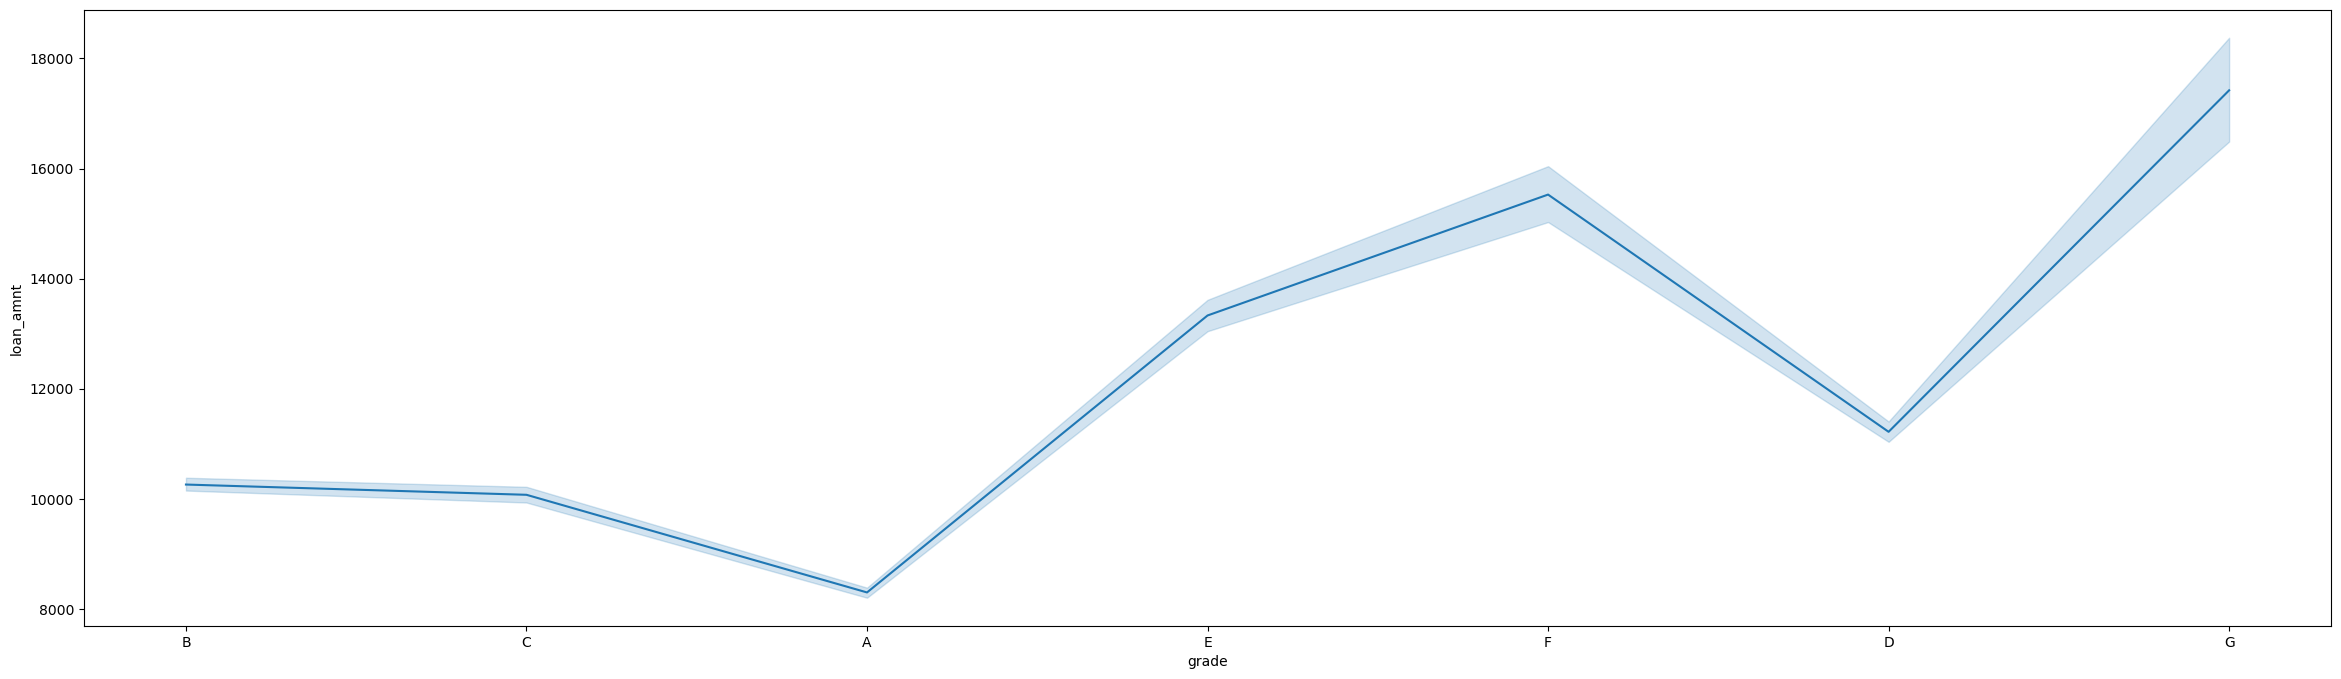

In [139]:
plt.figure(figsize=(29,8))
sns.lineplot(data=loan_df,y='loan_amnt',x='grade')
plt.show()

In [243]:
loan_amnt_by_grade = loan_df.groupby("grade")["loan_amnt"].count()
loan_amnt_pct_by_grade = loan_amnt_by_grade / loan_amnt_by_grade.sum() * 100
loan_amnt_pct_by_grade

grade
A    26.766775
B    30.520822
C    20.495143
D    13.148934
E     6.221391
F     2.213353
G     0.633583
Name: loan_amnt, dtype: float64

In [242]:
loan_amnt_by_grade = loan_df.groupby("grade")["loan_amnt"].sum()
loan_amnt_pct_by_grade = loan_amnt_by_grade / loan_amnt_by_grade.sum() * 100
loan_amnt_pct_by_grade

grade
A    21.830739
B    30.772264
C    20.288801
D    14.495177
E     8.150692
F     3.377525
G     1.084803
Name: loan_amnt, dtype: float64

### 49% of the loan amount and 44% of the loans are sanctioned to grades that are lower than A and B

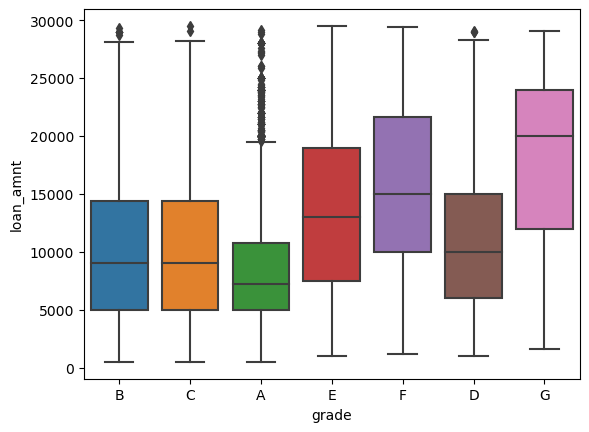

In [140]:
sns.boxplot(data=loan_df,y='loan_amnt',x='grade')
plt.show()

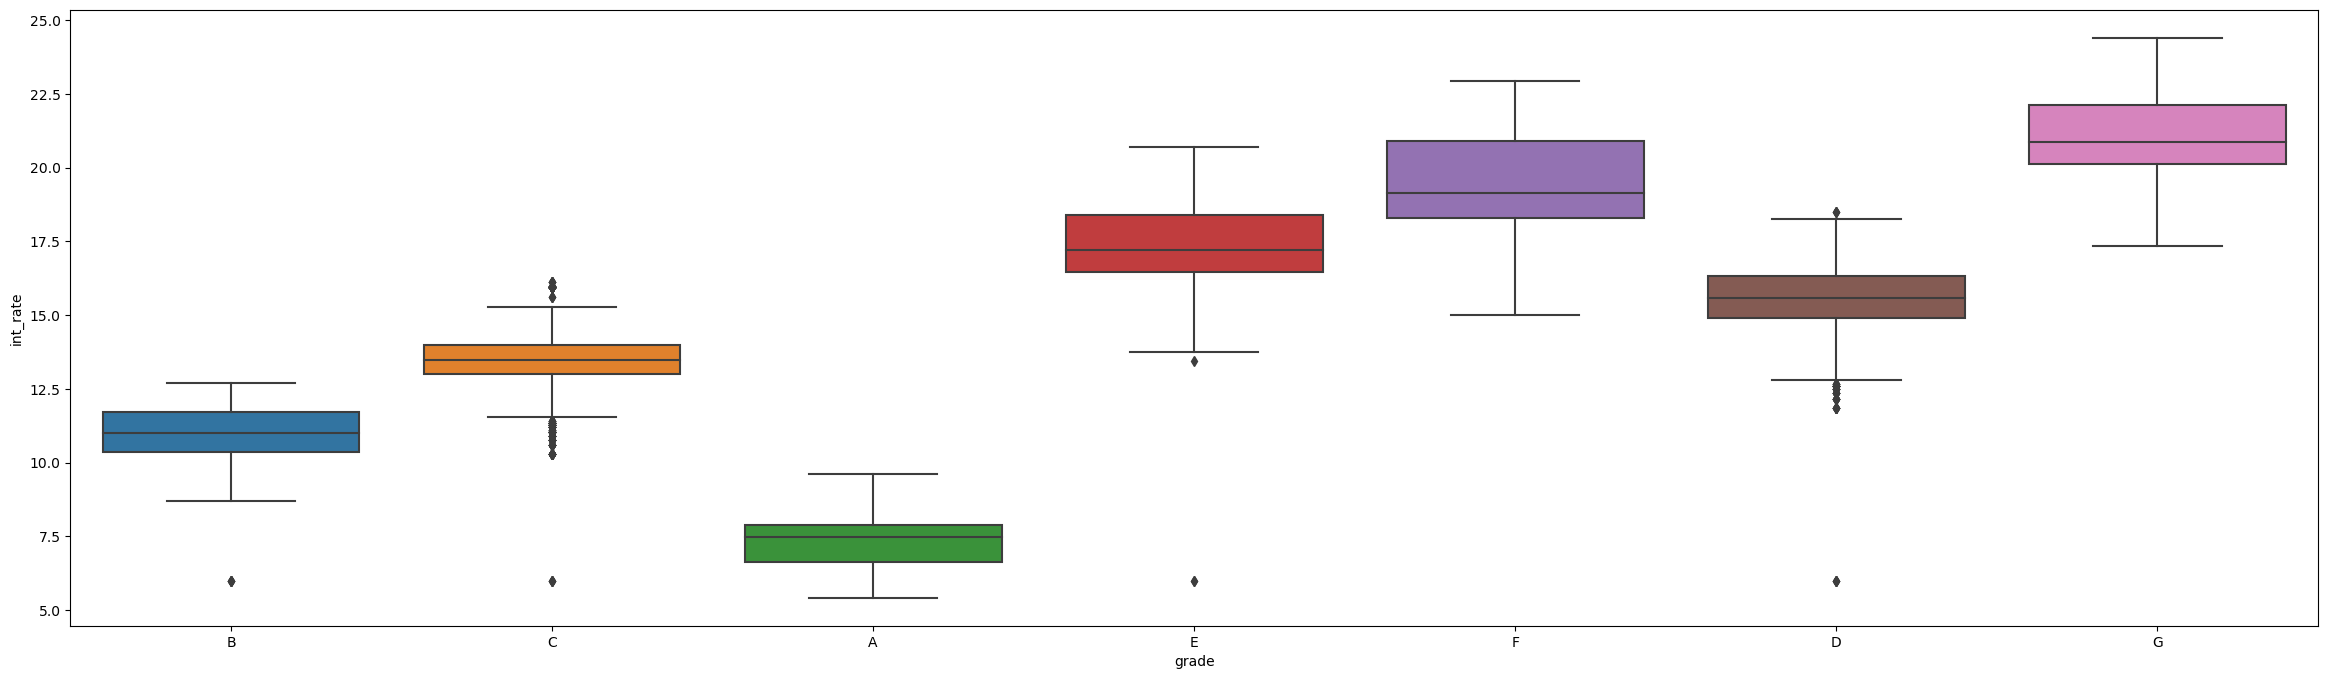

In [141]:
plt.figure(figsize=(29,8))
sns.boxplot(data=loan_df,y='int_rate',x='grade')
plt.show()

### Interest rate increases as we have loans for lower grades and the charge off rate for such loans is also very high. 

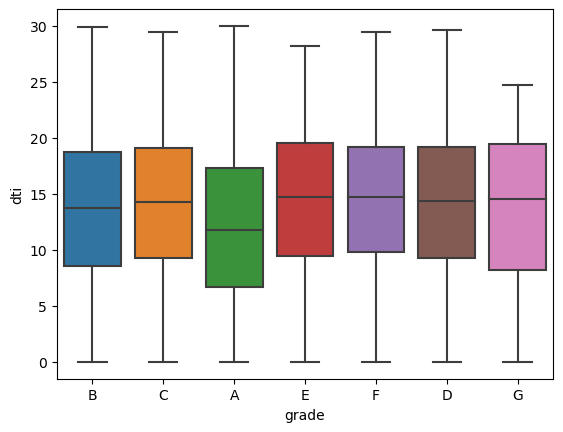

In [142]:
sns.boxplot(data=loan_df,y='dti',x='grade')
plt.show()

#### DTI Ratio is not given weightage while approving loan as we can see that it is same for almost all the grades excluding grade A. Additionally it could be also interpret that DTI ratio is similiar to all the grades which is not possible. There should be some measure to check while a customer is mentioning annual income to ensure it is filled correctly.

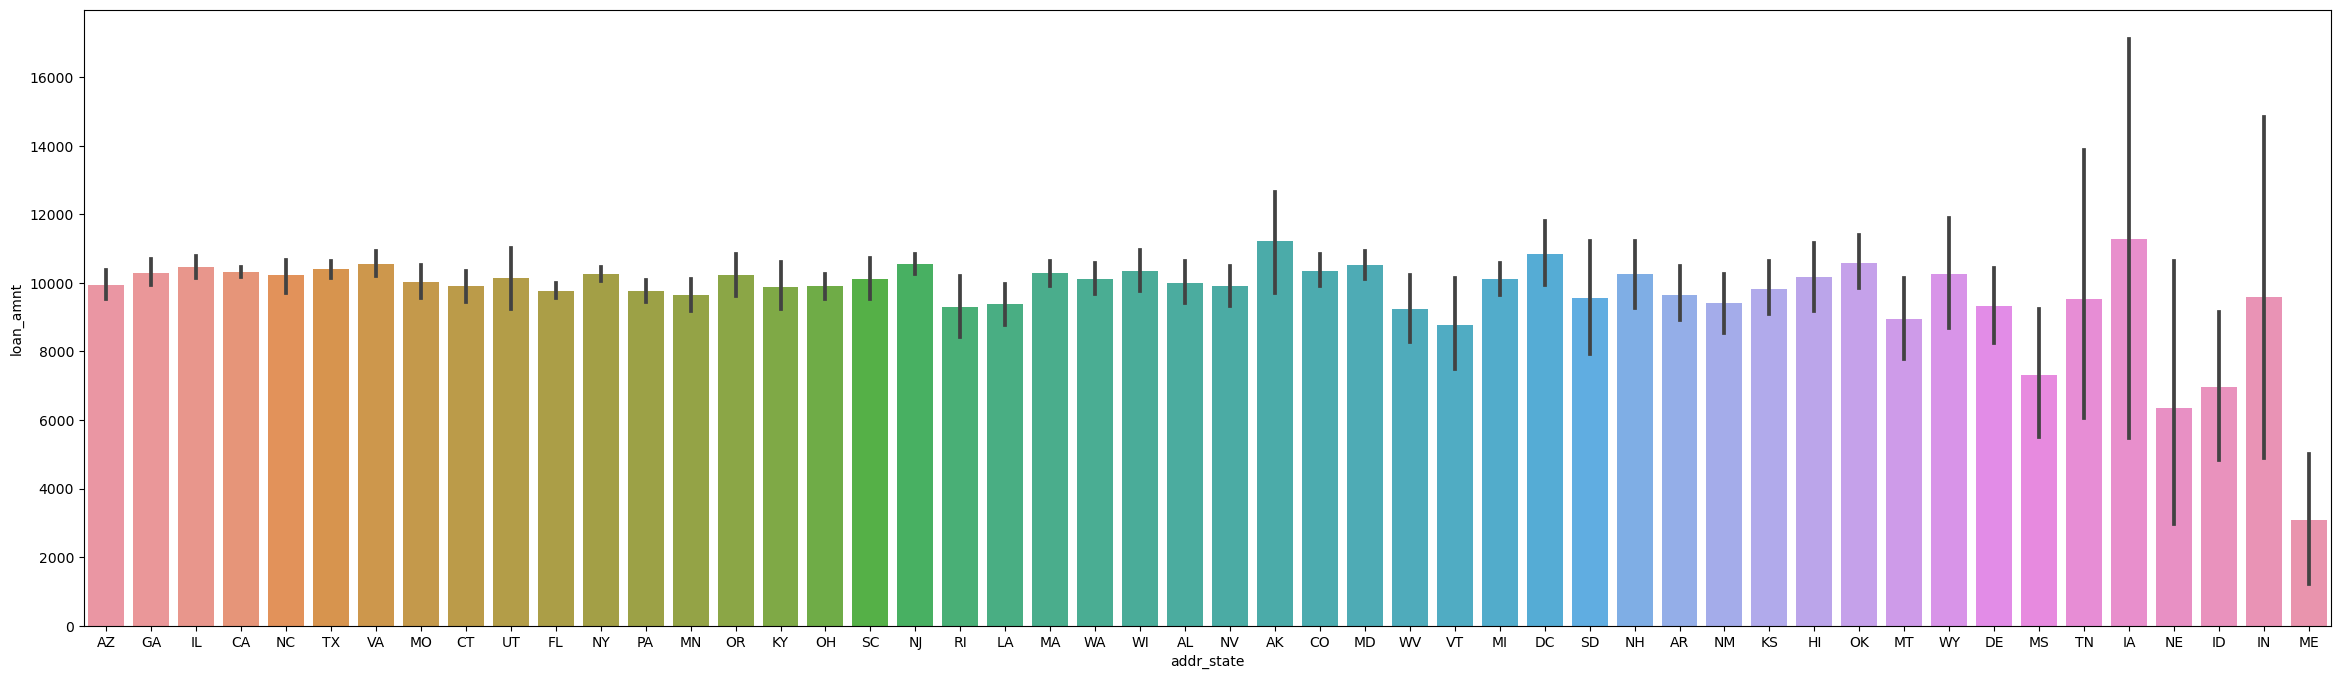

In [143]:
plt.figure(figsize=(29,8))
sns.barplot(data=loan_df,y='loan_amnt',x='addr_state')
plt.show()

### With lower loan also there are state that are getting defaulted which clearly identifies that state has less potential for repaying the loan as in the above case NE

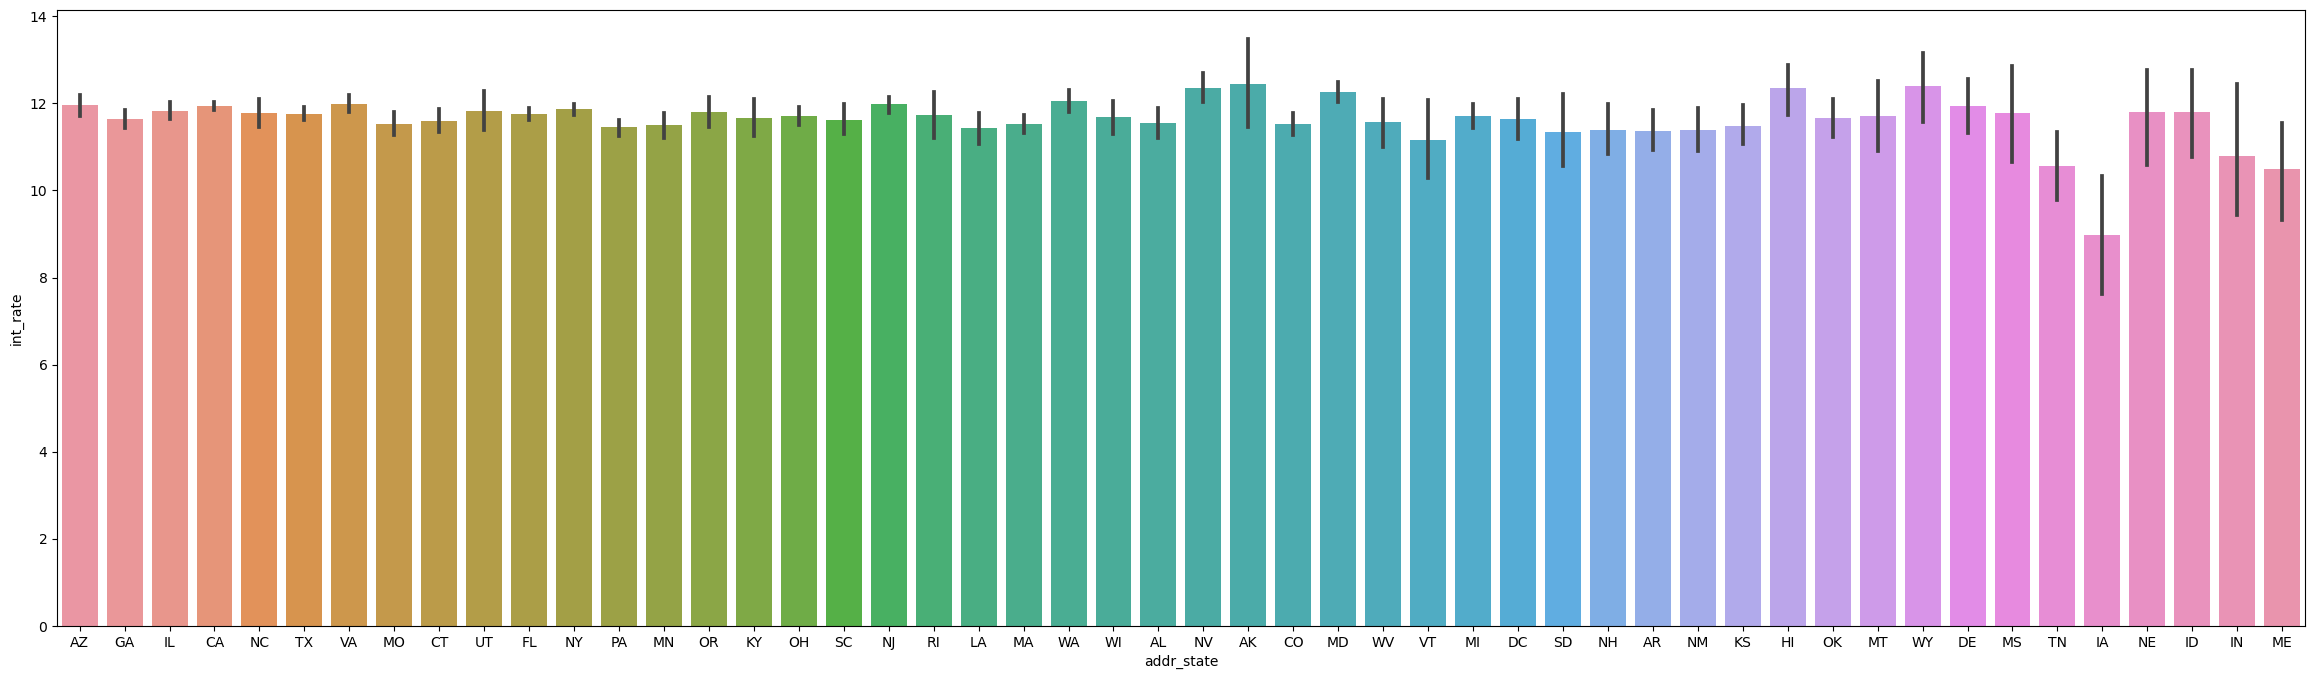

In [144]:
plt.figure(figsize=(29,8))
sns.barplot(data=loan_df,y='int_rate',x='addr_state')
plt.show()

#### In continuity of analysis done above , we can see that for states that have low loan amount and even low interest rate , the charged off rate is still high. Specific marker should be there to grade State also before sanctioning loan

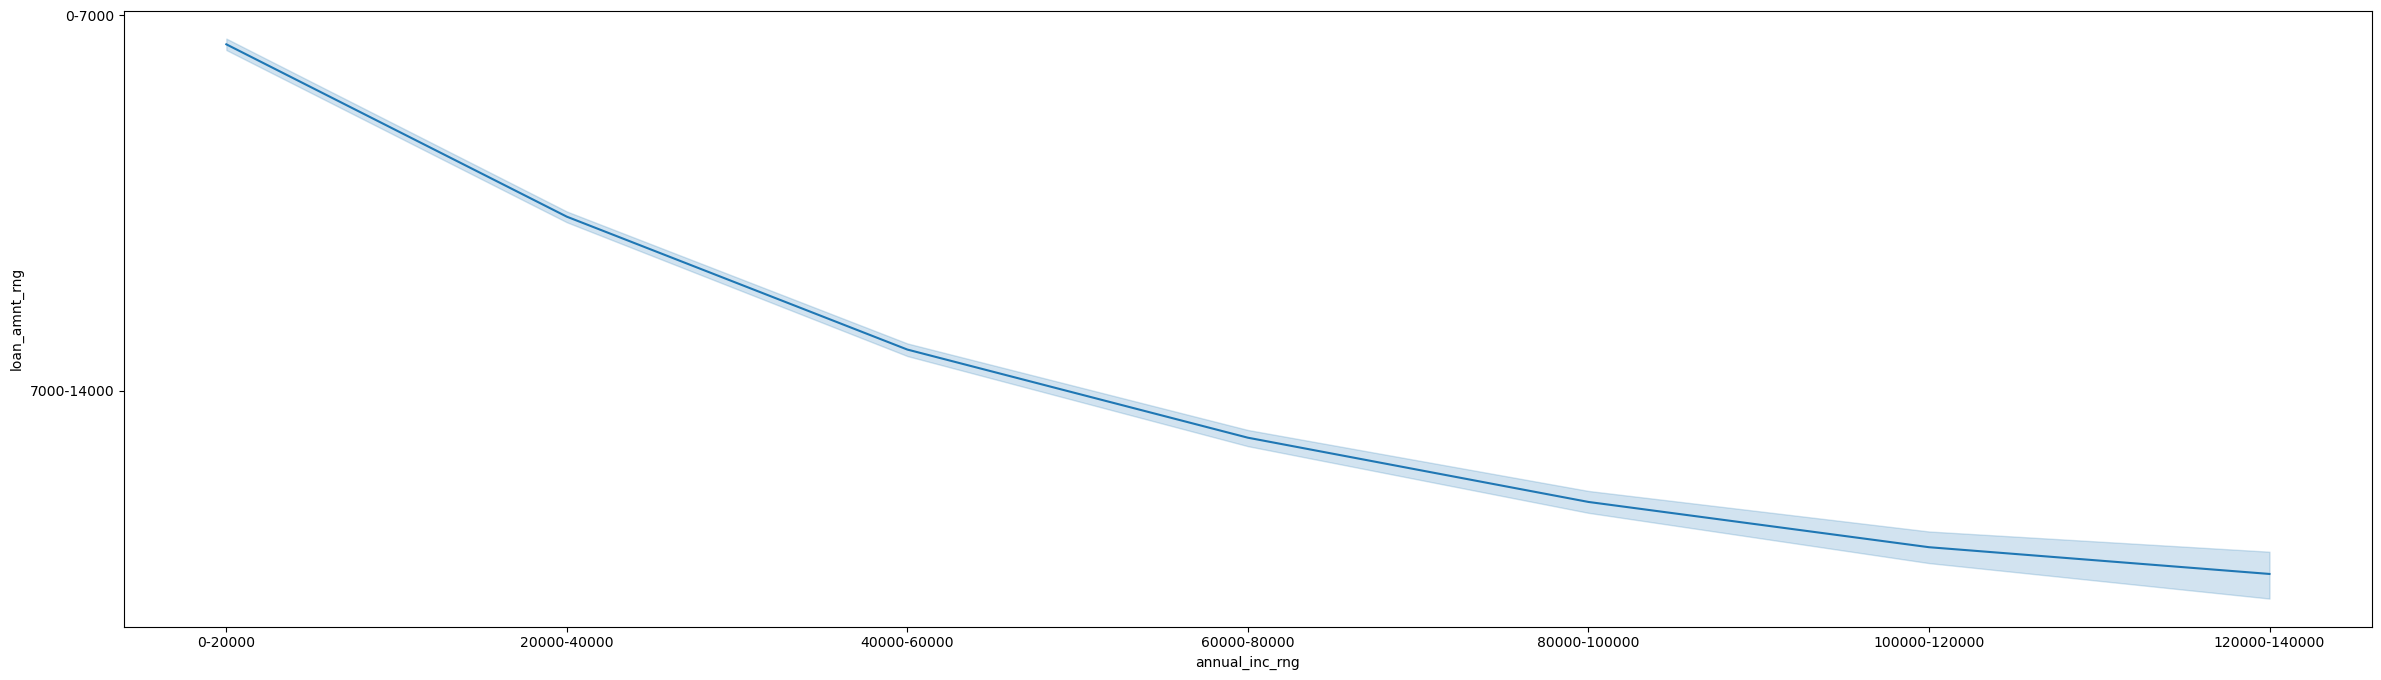

In [145]:
plt.figure(figsize=(29,8))
sns.lineplot(data=loan_df,y='loan_amnt_rng',x='annual_inc_rng')
plt.show()

#### As the income increases, the loan requirement gets decreased . This does not add any conclusion to the target variable and can be just an observation while finding relations

# Segmented Univariate Analysis

Getting the number of Charged Off Loan and Loans Paid in Complete

[Text(0, 0, '30626'), Text(0, 0, '5202')]

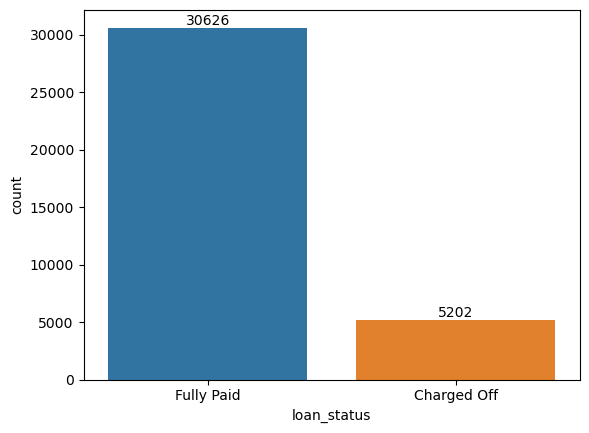

In [146]:
ax =sns.countplot(x=loan_df['loan_status'],data=loan_df)
ax.bar_label(ax.containers[0])

It can be seen from the above plot that we have 5627 as Charged Off Loan and Fully Paid loan are 32950

Now we will gather the categorical variables from the dataset and see the relation of Loan Default with them

#### Categorical Univariate Analysis





Checking the Grade of the Loans which are charged off

In [147]:
loan_charged_off=loan_df[(loan_df['loan_status']=='Charged Off')]

In [148]:
loan_charged_off['grade'].count()

5202

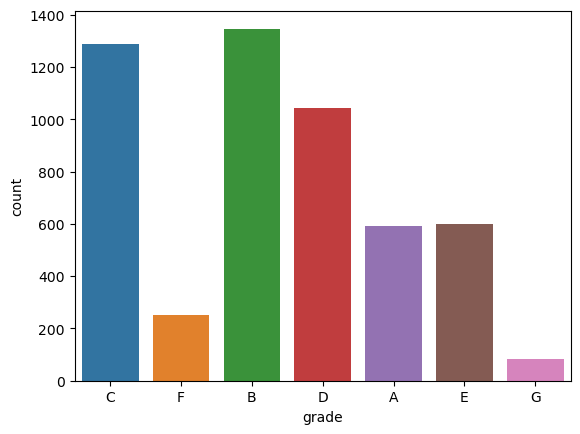

In [149]:
sns.countplot(x=loan_charged_off['grade'],data=loan_charged_off)
plt.show()

grade
A    11.361015
B    25.893887
C    24.798155
D    20.030757
E    11.495579
F     4.844291
G     1.576317
Name: loan_amnt, dtype: float64

**It can be seen from the above graphical representation that Loans of Grade B are mostly defaulted**

Checking the employment tenure of the people who have defaulted on loans

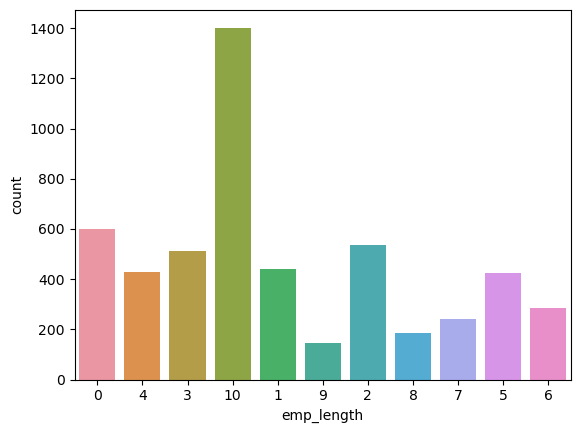

In [150]:
sns.countplot(x=loan_charged_off['emp_length'],data=loan_charged_off)
plt.show()

**It can be seen from the above graph employees which 10 or more years of experience have tendency to default on Loan**

Checking what is the status of home ownership of defaulted people

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

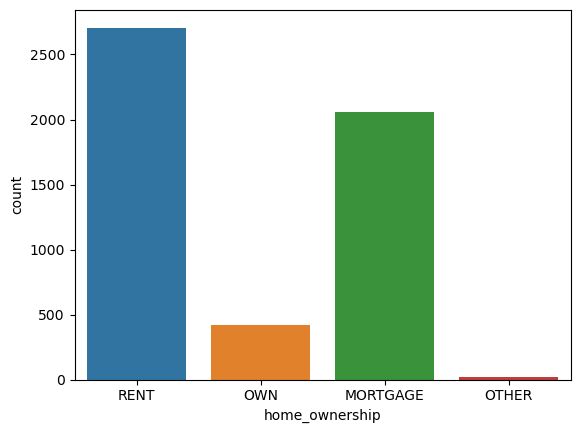

In [151]:
sns.countplot(x=loan_charged_off['home_ownership'],data=loan_charged_off)

**Maximum number of people who have defaulted have rented accomadation**

Now we will check from what state most of the defaulted people were

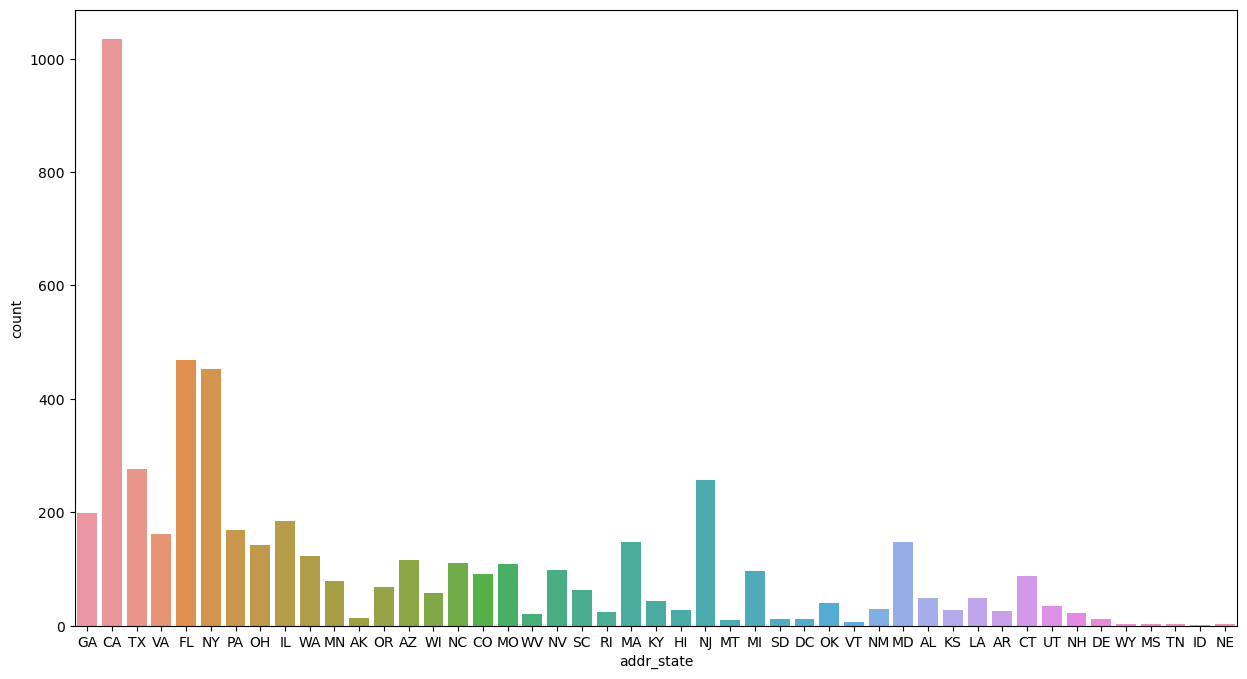

In [152]:
plt.figure(figsize=(15,8))
fig=sns.countplot(x=loan_charged_off['addr_state'],data=loan_charged_off)

**Majority of the defaults are happening from the state of California**

Now we will validate if the income of the applicants for defaulted loan was verified or not

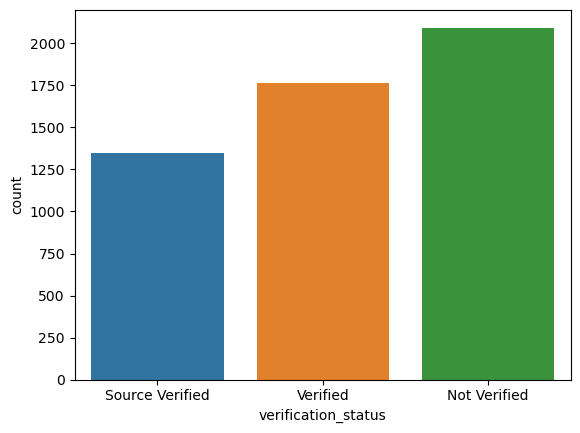

In [153]:
fig=sns.countplot(x=loan_charged_off['verification_status'],data=loan_charged_off)

**It is evident from the above graph that source of income of the defaulers was not verified**

Now we will check if any particular purpose of a loan plays an important part in defaulting on loan payment

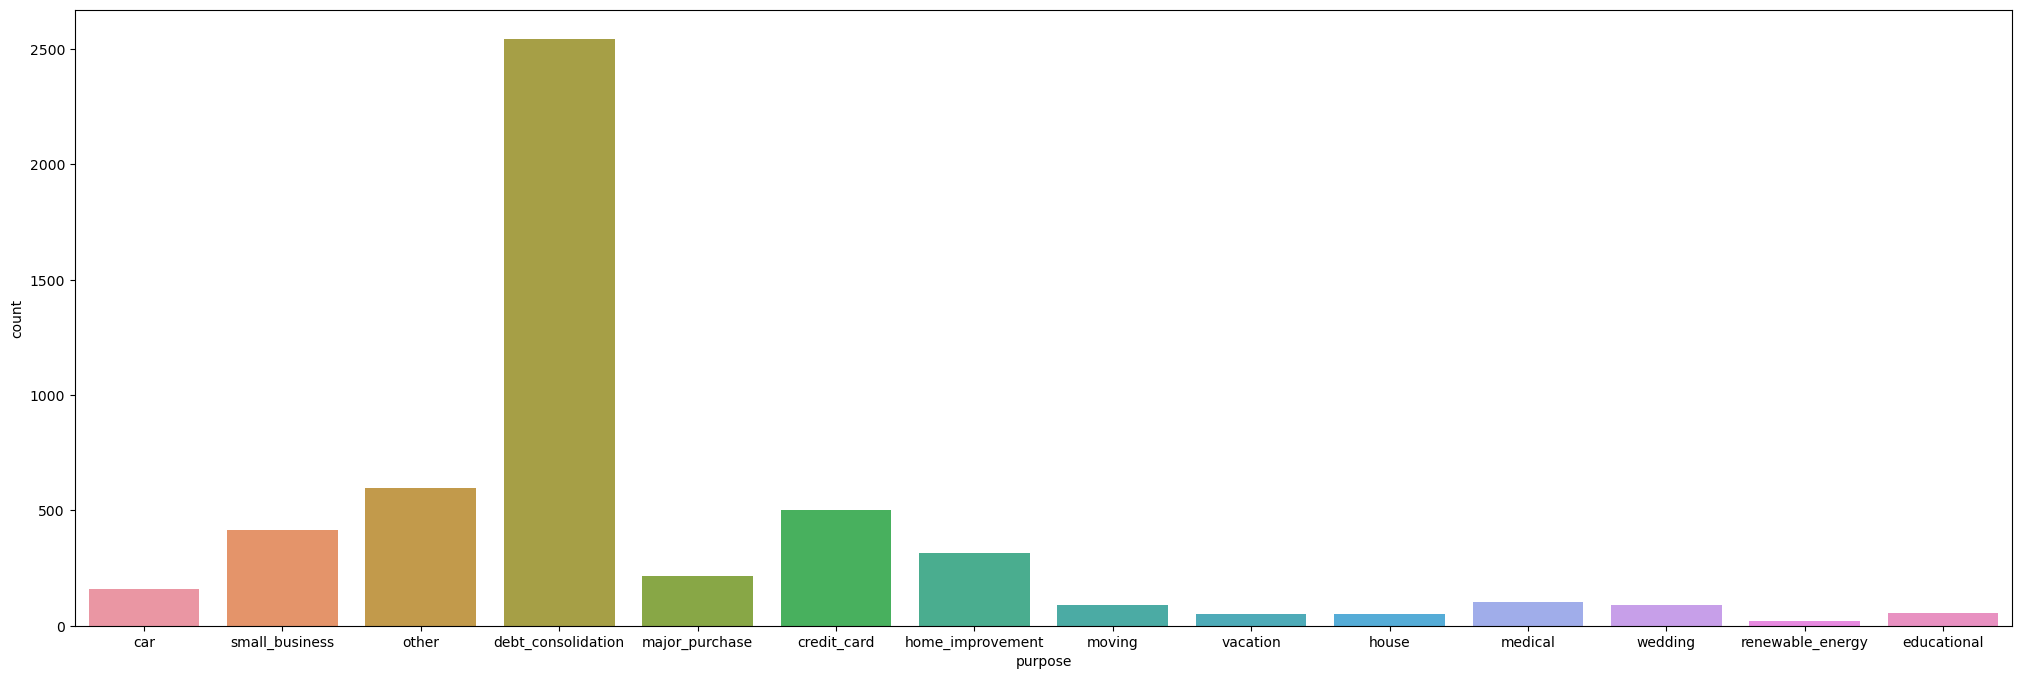

In [154]:
plt.figure(figsize=(25,8))
fig=sns.countplot(x=loan_charged_off['purpose'],data=loan_charged_off)

**From the above graph it could be seen that debt consolidation is the main purpose for which loan is taken and defaulted.This means that people already have certain debt on them**

Now we will see the month in which loans issued are defaulted

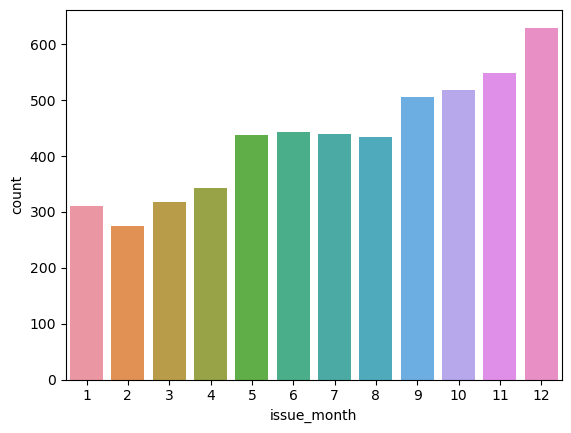

In [155]:
fig=sns.countplot(x=loan_charged_off['issue_month'],data=loan_charged_off)

**Most of the loans are issued in the month of December.This seems fair as it is Holiday season and people apply for loans**

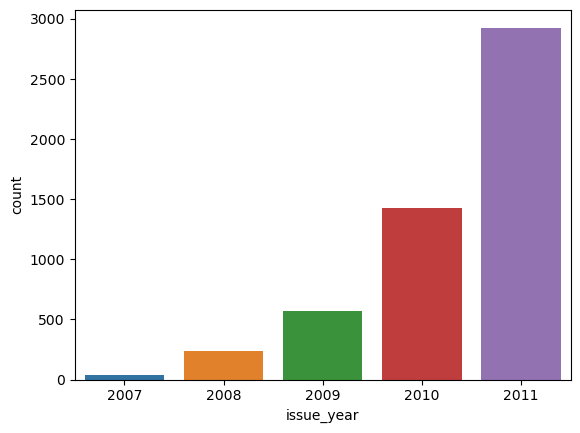

In [156]:
fig=sns.countplot(x=loan_charged_off['issue_year'],data=loan_charged_off)

**The number of loans issued have increased consistently and os has the default rate**

# *Multivariate* Analysis

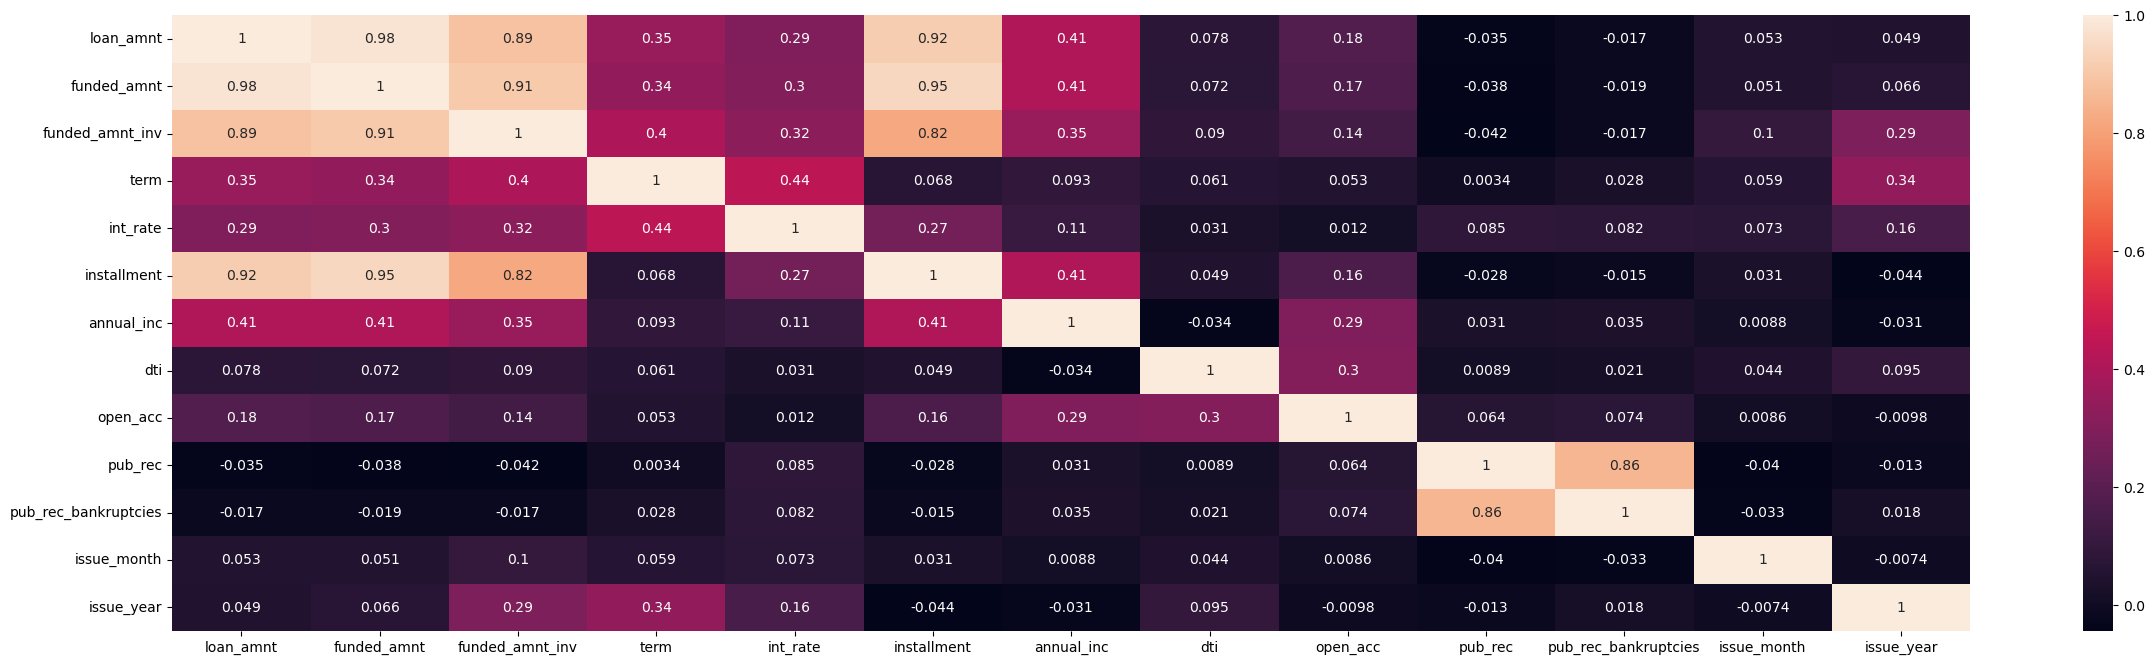

In [157]:
plt.figure(figsize=(29,8))
sns.heatmap(loan_df[loan_df['loan_status']=='Charged Off'].corr(),annot=True) 
plt.show()

As it can be seen from the above heat map.

1.   There is very high correlation between loan_amnt,funded_amnt,funded_amnt_inv.

2.   There is high correlation between pub_rec_bankruptcies and pub_rec

3.   There is medium correlation between open_acc and total_acc

4.   There is relatively medium correlation between term and int_rate





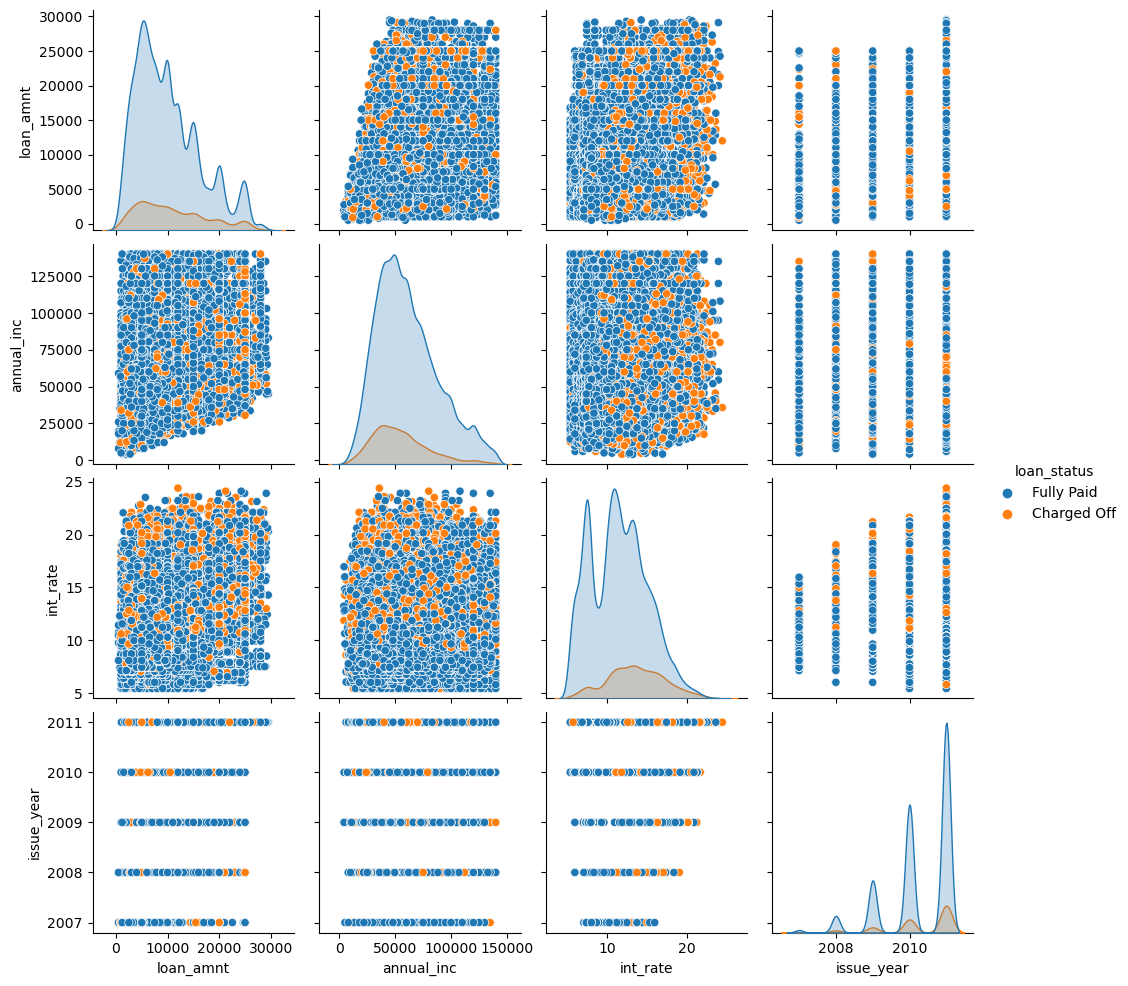

In [158]:
paiplot_dataframe=loan_df[['loan_amnt','annual_inc','int_rate','issue_year','loan_status']]
sns.pairplot(paiplot_dataframe,hue = 'loan_status')
plt.show()